In [ ]:
!pip install transformers
!pip install scikit-learn
!pip install wordcloud
!pip install pandas
!pip install torch

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import json

file_path = "hc3.jsonl"

In [ ]:
import pandas as pd
import json

# Initialize an empty list to hold the JSON objects
data = []

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        try:
            # Attempt to parse the JSON line
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            # Print error message if parsing fails
            print(f"Error decoding JSON: {e} - Line: {line}")

# Convert the list of JSON objects to a DataFrame
df = pd.DataFrame(data)

# Print the first 5 lines of the DataFrame
print(df.head())
print(df["source"])



                                            question  \
0  Why is every book I hear about a " NY Times # ...   
1  If salt is so bad for cars , why do we use it ...   
2  Why do we still have SD TV channels when HD lo...   
3  Why has nobody assassinated Kim Jong - un He i...   
4  How was airplane technology able to advance so...   

                                       human_answers  \
0  [Basically there are many categories of " Best...   
1  [salt is good for not dying in car crashes and...   
2  [The way it works is that old TV stations got ...   
3  [You ca n't just go around assassinating the l...   
4  [Wanting to kill the shit out of Germans drive...   

                                     chatgpt_answers  index       source  
0  [There are many different best seller lists th...    NaN  reddit_eli5  
1  [Salt is used on roads to help melt ice and sn...    NaN  reddit_eli5  
2  [There are a few reasons why we still have SD ...    NaN  reddit_eli5  
3  [It is generally not ac

In [ ]:
## Index doesn't make sense here
filtered_df = df[df['index'].notna()]
print(filtered_df)
df = df.drop(columns=['index'])
print(df["source"])



                                               question  \
1607  Can someone explain to me what a tax bracket i...   
1608  World War 2 . Explain like I 'm 5 . Who what w...   
1609  Ubuntu , I know it 's a Linux kernel . That 's...   
1610  LI5 : Can someone explain how someone can embe...   
1611  Can someone please explain to me how WiFi work...   
...                                                 ...   
4123  Why we hate Richard Nixon . I 'm not American ...   
4124  Cloud Computing . I do n't really grasp the me...   
4125  At what point is someone an addict Alcohol , d...   
4126  Why do bees die when they lose their stingers ...   
4127  Why do humans prefer their food warm ? Every o...   

                                          human_answers  \
1607  [A tax bracket says the percentage of your inc...   
1608  [After WW1 , Germany was incredibly poor due t...   
1609  [First off , it 's a Linux distribution based ...   
1610  [Embezzling can happen many different ways . I...

In [ ]:
# check in there is a NaN in each column
df.isnull().sum()

question           0
human_answers      0
chatgpt_answers    0
source             0
dtype: int64

# 2 - Sentimentos e similaridade

In [ ]:
from transformers import pipeline

# Load the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def analyze_sentiment_transformers(text, threshold=0.6):
    try:
        # Print original text
        print("Original Text:", text)

        # Truncate the text to 512 characters
        truncated_text = text[:512]
        print("Truncated Text:", truncated_text)

        # Perform sentiment analysis
        result = sentiment_pipeline(truncated_text)[0]
        score = result['score']
        label = result['label']

        # Define thresholds for neutral
        sentiment_label = 'NEUTRAL' if (label == 'POSITIVE' and score < threshold) or (label == 'NEGATIVE' and score < threshold) else label
        print("Sentiment Label:", sentiment_label, "Score:", score)

        return sentiment_label
    except (IndexError, RuntimeError) as e:
        # Print error message and skip row
        print("RuntimeError:", e)
        return "NaN"

# Apply the function to your DataFrame
df_sentiment = df
df_sentiment['gpt_sentiment'] = df_sentiment['chatgpt_answers'].apply(lambda x: analyze_sentiment_transformers(x))
df_sentiment['human_sentiment'] = df_sentiment['human_answers'].apply(lambda x: analyze_sentiment_transformers(x))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Original Text: ['There are many different best seller lists that are published by various organizations, and the New York Times is just one of them. The New York Times best seller list is a weekly list that ranks the best-selling books in the United States based on sales data from a number of different retailers. The list is published in the New York Times newspaper and is widely considered to be one of the most influential best seller lists in the book industry. \nIt\'s important to note that the New York Times best seller list is not the only best seller list out there, and there are many other lists that rank the top-selling books in different categories or in different countries. So it\'s possible that a book could be a best seller on one list but not on another. \nAdditionally, the term "best seller" is often used more broadly to refer to any book that is selling well, regardless of whether it is on a specific best seller list or not. So it\'s possible that you may hear about a bo

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Truncated Text: ["The 401(k) contribution is Federal tax free, when you make the contribution, and most likely State too.  I believe that is true for California, specifically. There was a court case some years ago about people making 401(k) or IRA contributions in New York, avoiding the New York state income tax.  Then they moved to Florida (no income tax), and took the money out.  New York sued, saying they had to pay the New York income tax that had been deferred, but the court said no.  So you should be able to avoid California state income tax, and then later if you were to move to, for example, Texas (no income tax), have no state income tax liability. At the Federal level, you will have different problems.  You won't have the money; it will be held by the 401(k) trustee.  When you try to access the money (cash the account out), you will have to pay the deferred taxes.  Effectively, when you remove the money it becomes income in t

In [ ]:
df = df_sentiment
print(df['source'])

0        reddit_eli5
1        reddit_eli5
2        reddit_eli5
3        reddit_eli5
4        reddit_eli5
            ...     
24317       medicine
24318       medicine
24319       medicine
24320       medicine
24321       medicine
Name: source, Length: 24322, dtype: object


In [ ]:
def calculate_similarity(text1, text2):
    # Vectorizing the text using TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Calculating cosine similarity
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity

# Ensure text data is in string format
df['human_answers'] = df['human_answers'].astype(str)
df['chatgpt_answers'] = df['chatgpt_answers'].astype(str)

# Calculate similarity
df['similarity'] = df.apply(lambda row: calculate_similarity(row['human_answers'], row['chatgpt_answers']), axis=1)


In [ ]:
# Specify the file name
output_file_name = 'updated_hc3.json'

# Save the DataFrame to a JSON file
df.to_json(output_file_name, orient='records', lines=True)


In [ ]:
## Import the updated dataset

import pandas as pd
import json

# Initialize an empty list to store the data
data = []

# Open the file and read line by line
with open('updated_hc3.json', 'r') as file:
    for line in file:
        try:
            # Convert each line to a Python dictionary (JSON object)
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            # Print the error and the problematic line if JSON decoding fails
            print(f"Error decoding JSON: {e} - Line: {line}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Check the first few rows of the DataFrame
print(df["source"])


0        reddit_eli5
1        reddit_eli5
2        reddit_eli5
3        reddit_eli5
4        reddit_eli5
            ...     
24317       medicine
24318       medicine
24319       medicine
24320       medicine
24321       medicine
Name: source, Length: 24322, dtype: object


In [ ]:
# Define the allowed sentiment values
allowed_sentiments = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']

# Filter the DataFrame
df = df[(df['human_sentiment'].isin(allowed_sentiments)) &
                 (df['gpt_sentiment'].isin(allowed_sentiments))]

# Check the result
print(df.head())


                                            question  \
0  Why is every book I hear about a " NY Times # ...   
1  If salt is so bad for cars , why do we use it ...   
2  Why do we still have SD TV channels when HD lo...   
3  Why has nobody assassinated Kim Jong - un He i...   
4  How was airplane technology able to advance so...   

                                       human_answers  \
0  ['Basically there are many categories of " Bes...   
1  ['salt is good for not dying in car crashes an...   
2  ["The way it works is that old TV stations got...   
3  ["You ca n't just go around assassinating the ...   
4  ['Wanting to kill the shit out of Germans driv...   

                                     chatgpt_answers       source  \
0  ['There are many different best seller lists t...  reddit_eli5   
1  ["Salt is used on roads to help melt ice and s...  reddit_eli5   
2  ["There are a few reasons why we still have SD...  reddit_eli5   
3  ['It is generally not acceptable or ethical to.

In [ ]:
print("Size of the dataset:", df.size)
print("Average of similarity: ",df['similarity'].mean())
print("Number of times the sentiment was different:", (df['gpt_sentiment'] != df['human_sentiment']).sum())


Size of the dataset: 151676
Average of similarity:  0.4488961362161298
Number of times the sentiment was different: 7527


In [ ]:
source_diff_count = df.groupby('source').apply(lambda x: (x['gpt_sentiment'] != x['human_sentiment']).sum())
source_ranking = source_diff_count.sort_values(ascending=False)

# Print the ranking
print("Sources with the biggest difference in sentiment: ", source_ranking)

Sources with the biggest difference in sentiment:  source
reddit_eli5    5256
finance        1110
medicine        491
open_qa         400
wiki_csai       270
dtype: int64


In [ ]:
# Calculate the mean similarity for each source
source_avg_similarity = df.groupby('source')["similarity"].mean()

# Sort the average similarities in ascending order
source_ranking = source_avg_similarity.sort_values(ascending=True)

# Print the ranking
print("Sources with the biggest difference in similarity (lower average similarity):")
print(source_ranking)


Sources with the biggest difference in similarity (lower average similarity):
source
medicine       0.282978
finance        0.382947
open_qa        0.413146
reddit_eli5    0.477968
wiki_csai      0.524431
Name: similarity, dtype: float64


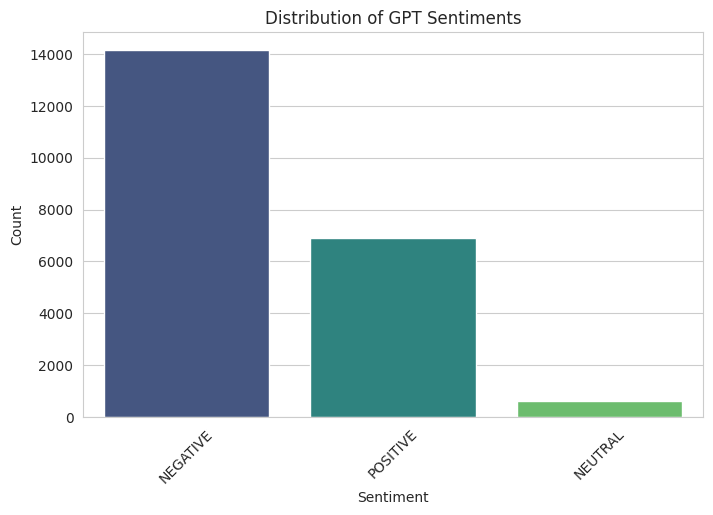

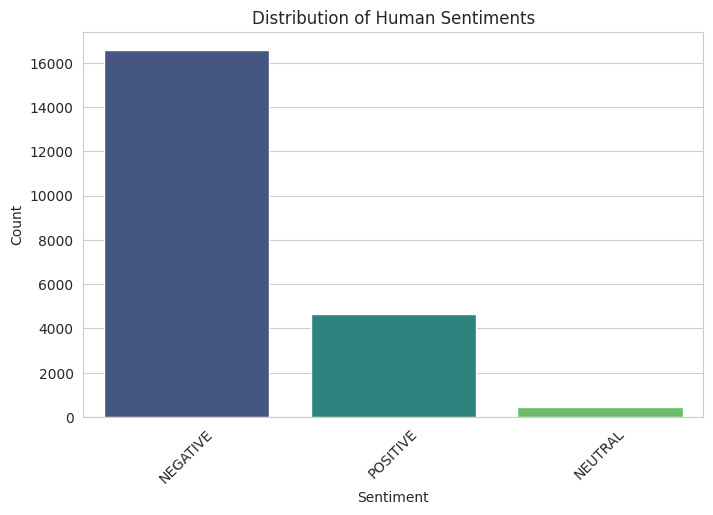

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the order of categories
category_order = ['NEGATIVE','POSITIVE','NEUTRAL']

# Distribution of GPT sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='gpt_sentiment', data=df, order=category_order, palette='viridis')
plt.title('Distribution of GPT Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Human sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='human_sentiment', data=df, order=category_order, palette='viridis')
plt.title('Distribution of Human Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


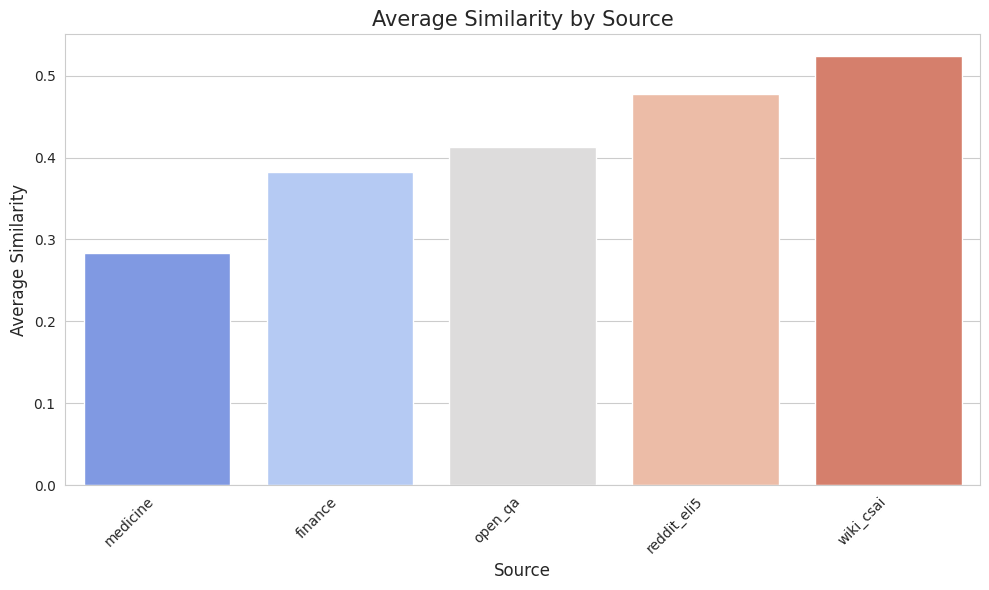

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate the mean similarity for each source and sort
source_avg_similarity = df.groupby('source')['similarity'].mean().sort_values()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=source_avg_similarity.index, y=source_avg_similarity.values, palette='coolwarm')

# Set the title and labels
plt.title('Average Similarity by Source', fontsize=15)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Average Similarity', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


# 3 - Palavras e expressões

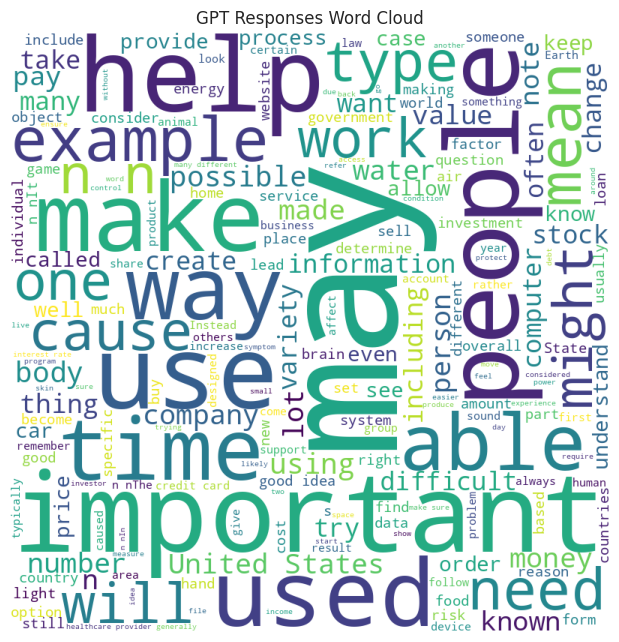

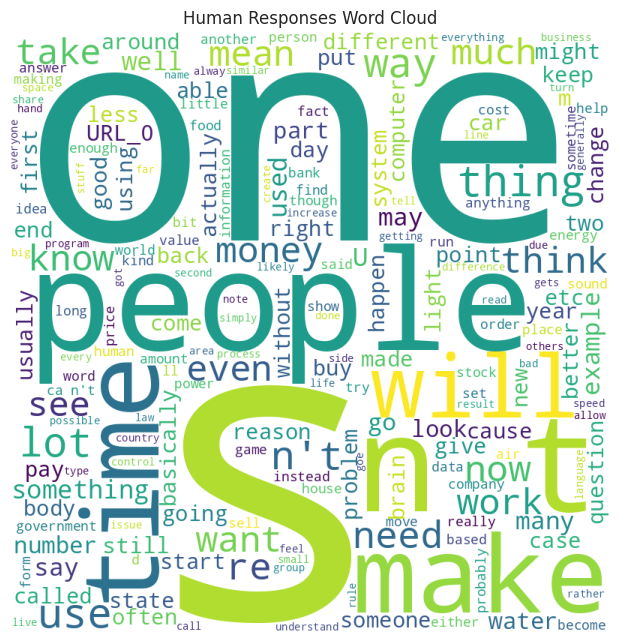

In [ ]:
# Concatenate all GPT responses into a single string
gpt_responses = ' '.join(df_sentiment['chatgpt_answers'].dropna().astype(str))

# Concatenate all human responses into a single string
human_responses = ' '.join(df_sentiment['human_answers'].dropna().astype(str))

# Generate a word cloud for GPT responses
gpt_wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate(gpt_responses)

# Display the GPT word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(gpt_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("GPT Responses Word Cloud")
plt.show()

# Generate a word cloud for human responses
human_wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(human_responses)

# Display the human word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(human_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Human Responses Word Cloud")
print("\n\n")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


GPT Most Common Word Bi-grams: [('of the', 26067), ('in the', 18046), ('is a', 15404), ('it is', 12566), ('such as', 11453), ('can be', 11325), ('to the', 10811), ('important to', 10593), ('on the', 9718), ('and the', 9041)]
Human Most Common Word Bi-grams: [('of the', 24160), ('in the', 16922), ('to the', 10963), ('is a', 9589), ('on the', 8391), ('to be', 8315), ('it is', 6852), ('and the', 6667), ('the same', 6508), ('in a', 6247)]


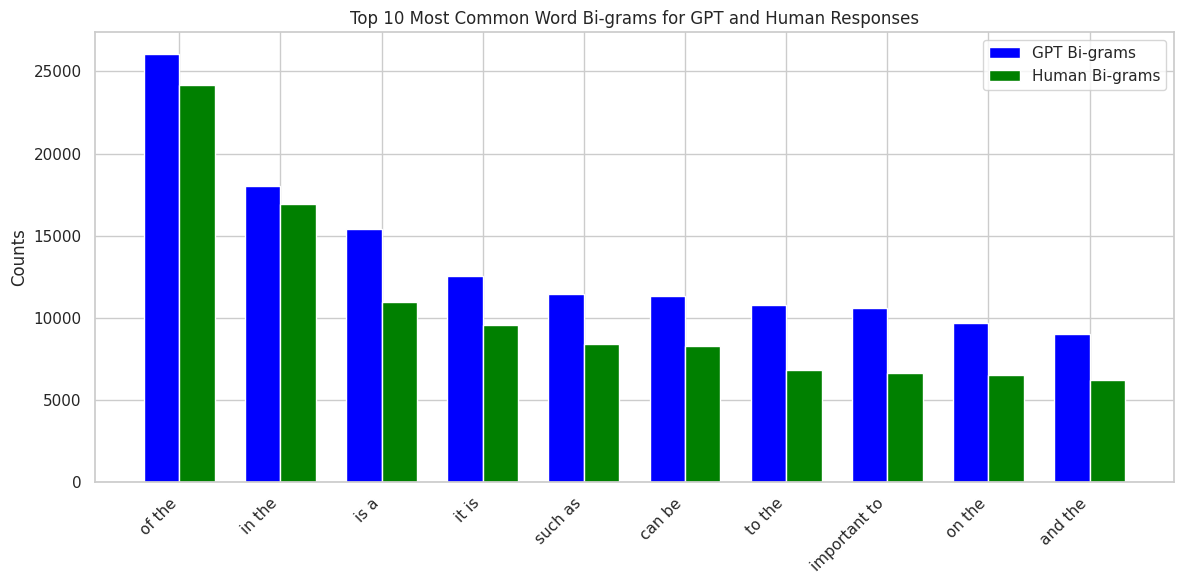

In [ ]:
#Detect most common bigrams

import nltk
import string
from nltk import bigrams
from collections import Counter

nltk.download('punkt')

def extract_word_bigrams(text):
    # Tokenize the text and filter out punctuation
    tokens = [word for word in nltk.word_tokenize(text) if word.isalpha()]

    # Generate bigrams
    word_bigrams = bigrams(tokens)

    return [' '.join(bigram) for bigram in word_bigrams]

# Apply to your DataFrame
gpt_bigrams = extract_word_bigrams(' '.join(df['chatgpt_answers'].dropna()))
human_bigrams = extract_word_bigrams(' '.join(df['human_answers'].dropna()))

# Display the most common bi-grams, excluding punctuation
print("GPT Most Common Word Bi-grams:", Counter(gpt_bigrams).most_common(10))
print("Human Most Common Word Bi-grams:", Counter(human_bigrams).most_common(10))

# Getting the top 10 bi-grams and their counts
top_gpt_bigrams = Counter(gpt_bigrams).most_common(10)
top_human_bigrams = Counter(human_bigrams).most_common(10)
gpt_bigram_labels, gpt_bigram_counts = zip(*top_gpt_bigrams)
human_bigram_labels, human_bigram_counts = zip(*top_human_bigrams)

import matplotlib.pyplot as plt
import numpy as np

# Setting the positions and width for the bars
pos = np.arange(len(gpt_bigram_labels))
bar_width = 0.35

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Bars for GPT bi-grams
plt.bar(pos, gpt_bigram_counts, bar_width, label='GPT Bi-grams', color='blue')

# Bars for Human bi-grams
plt.bar(pos + bar_width, human_bigram_counts, bar_width, label='Human Bi-grams', color='green')

# Adding labels and title
plt.xticks(pos + bar_width / 2, gpt_bigram_labels, rotation=45, ha='right')
plt.ylabel('Counts')
plt.title('Top 10 Most Common Word Bi-grams for GPT and Human Responses')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


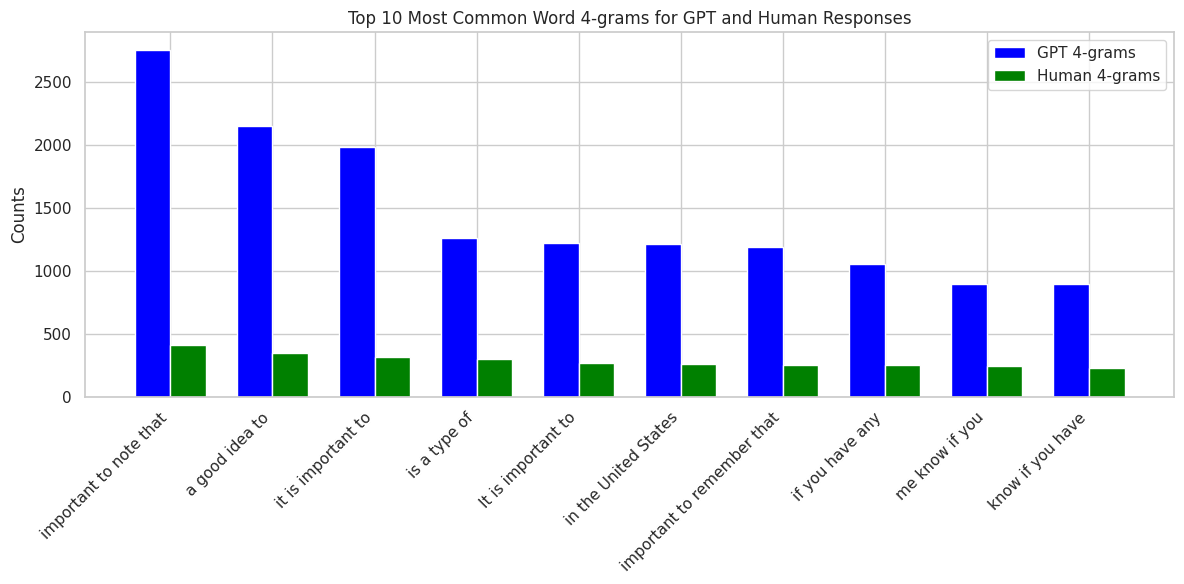

In [ ]:
import nltk
from nltk import ngrams
from collections import Counter

nltk.download('punkt')

def extract_word_ngrams(text, n):
    # Tokenize the text and filter out punctuation
    tokens = [word for word in nltk.word_tokenize(text) if word.isalpha()]

    # Generate n-grams
    word_ngrams = ngrams(tokens, n)

    return [' '.join(gram) for gram in word_ngrams]

# Specify the number of n-grams
n = 4

# Apply to your DataFrame
gpt_ngrams = extract_word_ngrams(' '.join(df['chatgpt_answers'].dropna()), n)
human_ngrams = extract_word_ngrams(' '.join(df['human_answers'].dropna()), n)

# Getting the top 10 4-grams and their counts
top_gpt_4grams = Counter(gpt_ngrams).most_common(10)
top_human_4grams = Counter(human_ngrams).most_common(10)

# Separate the 4-grams and their counts
gpt_4gram_labels, gpt_4gram_counts = zip(*top_gpt_4grams)
human_4gram_labels, human_4gram_counts = zip(*top_human_4grams)

# Setting the positions and width for the bars
pos = np.arange(len(gpt_4gram_labels))
bar_width = 0.35

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Bars for GPT 4-grams
plt.bar(pos, gpt_4gram_counts, bar_width, label=f'GPT {n}-grams', color='blue')

# Bars for Human 4-grams
plt.bar(pos + bar_width, human_4gram_counts, bar_width, label=f'Human {n}-grams', color='green')

# Adding labels and title
plt.xticks(pos + bar_width / 2, gpt_4gram_labels, rotation=45, ha='right')
plt.ylabel('Counts')
plt.title(f'Top 10 Most Common Word {n}-grams for GPT and Human Responses')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()




# 4 -  Voz passiva e ativa

In [ ]:
#tetect if is a passive voice
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('averaged_perceptron_tagger')


def is_passive(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)

    # Look for a form of 'to be' followed by a past participle
    for i in range(len(tagged) - 1):
        if tagged[i][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] and tagged[i+1][1] == 'VBN':  #to be -> past principle
            return True
    return False

def count_passive_voice(text):
    sentences = sent_tokenize(text)
    return sum([is_passive(sentence) for sentence in sentences])

# Apply to DataFrame
df['gpt_passive_voice'] = df['chatgpt_answers'].apply(count_passive_voice)
df['human_passive_voice'] = df['human_answers'].apply(count_passive_voice)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def is_potentially_active(sentence):
    tokens = word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)

    # Look for a form of 'to be' followed by a past participle
    for i in range(len(tagged) - 1):
        if tagged[i][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] and tagged[i+1][1] == 'VBN':
            return False  # This is likely passive
    return True  # Not passive, potentially active

def count_active_voice(text):
    sentences = sent_tokenize(text)
    return sum([is_potentially_active(sentence) for sentence in sentences])

# Apply to DataFrame
df['gpt_active_voice'] = df['chatgpt_answers'].apply(count_active_voice)
df['human_active_voice'] = df['human_answers'].apply(count_active_voice)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
print(df)

                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
24317  Is rise in pressure from 116/66 to 140/80 norm...   
24318  What could cause a painless lump in the right ...   
24319  Can Acutret be given to a child for treatment ...   
24320  Are BP of 119/65 and pulse of 35 causes for co...   
24321  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

In [ ]:
df.to_csv('updated_dataframe.csv', index=False)


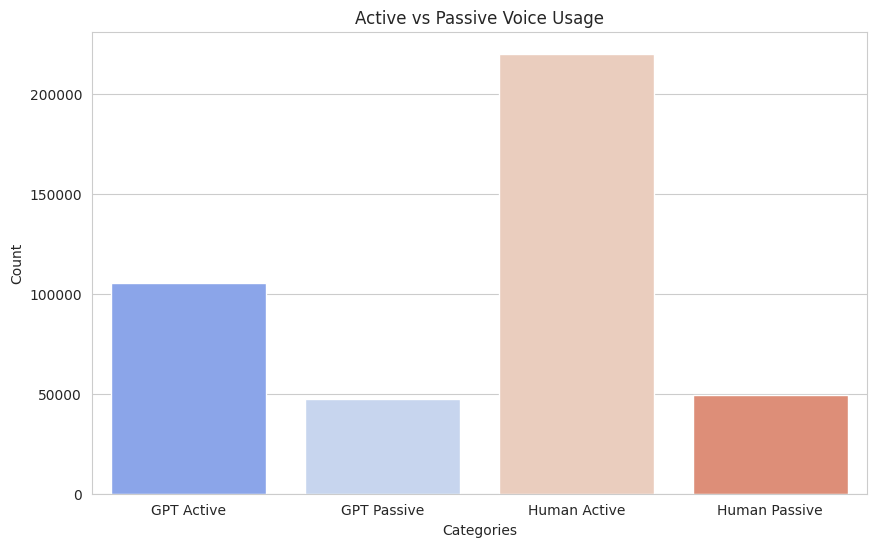

In [ ]:
# Counting the occurrences

gpt_active_count = df['gpt_active_voice'].sum()
gpt_passive_count = df['gpt_passive_voice'].sum()

human_active_count = df['human_active_voice'].sum()
human_passive_count = df['human_passive_voice'].sum()

import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
categories = ['GPT Active', 'GPT Passive', 'Human Active', 'Human Passive']
counts = [gpt_active_count, gpt_passive_count, human_active_count, human_passive_count]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Creating the bar plot
sns.barplot(x=categories, y=counts, palette='coolwarm')

# Adding titles and labels
plt.title('Active vs Passive Voice Usage')
plt.ylabel('Count')
plt.xlabel('Categories')

# Show the plot
plt.show()



In [ ]:

voice_difference_count = sum(
    (df['gpt_active_voice'] != df['human_active_voice'])
)

print("Number of times the voice (active/passive) was different:", voice_difference_count)


Number of times the voice (active/passive) was different: 20497


In [ ]:

threshold = 0.6

# Calculate proportions and determine predominance
df['gpt_active_dominant'] = df['gpt_active_voice'] / (df['gpt_active_voice'] + df['gpt_passive_voice']) > threshold
df['gpt_passive_dominant'] = df['gpt_passive_voice'] / (df['gpt_active_voice'] + df['gpt_passive_voice']) > threshold
df['human_active_dominant'] = df['human_active_voice'] / (df['human_active_voice'] + df['human_passive_voice']) > threshold
df['human_passive_dominant'] = df['human_passive_voice'] / (df['human_active_voice'] + df['human_passive_voice']) > threshold

# Count where GPT is predominantly active and human is predominantly passive
active_vs_passive = sum(df['gpt_active_dominant'] & df['human_passive_dominant'])

# Count where GPT is predominantly passive and human is predominantly active
passive_vs_active = sum(df['gpt_passive_dominant'] & df['human_active_dominant'])

# Total count of significant differences
total_significant_differences = active_vs_passive + passive_vs_active

print("Number of times the voice was significantly different (active vs passive or passive vs active):", total_significant_differences)


Number of times the voice was significantly different (active vs passive or passive vs active): 2513


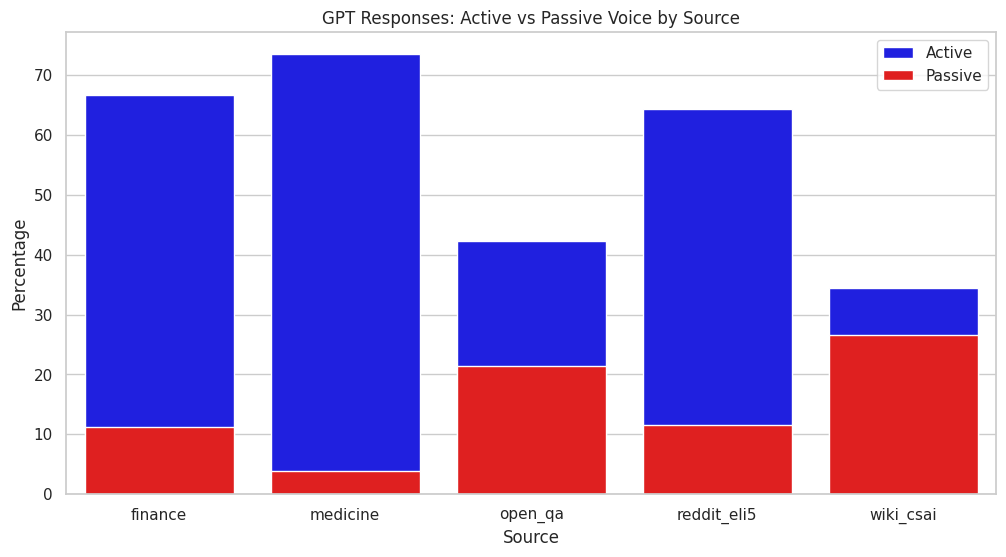

In [ ]:
import pandas as pd

# Group by source and calculate the percentage of predominantly active and passive responses
source_grouped = df.groupby('source').agg(
    gpt_active_percent=pd.NamedAgg(column='gpt_active_dominant', aggfunc=lambda x: x.mean() * 100),
    gpt_passive_percent=pd.NamedAgg(column='gpt_passive_dominant', aggfunc=lambda x: x.mean() * 100),
    human_active_percent=pd.NamedAgg(column='human_active_dominant', aggfunc=lambda x: x.mean() * 100),
    human_passive_percent=pd.NamedAgg(column='human_passive_dominant', aggfunc=lambda x: x.mean() * 100)
).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# GPT Active vs Passive by Source
sns.barplot(x='source', y='gpt_active_percent', data=source_grouped, color='blue', label='Active')
sns.barplot(x='source', y='gpt_passive_percent', data=source_grouped, color='red', label='Passive')

plt.title('GPT Responses: Active vs Passive Voice by Source')
plt.ylabel('Percentage')
plt.xlabel('Source')
plt.legend()

plt.show()



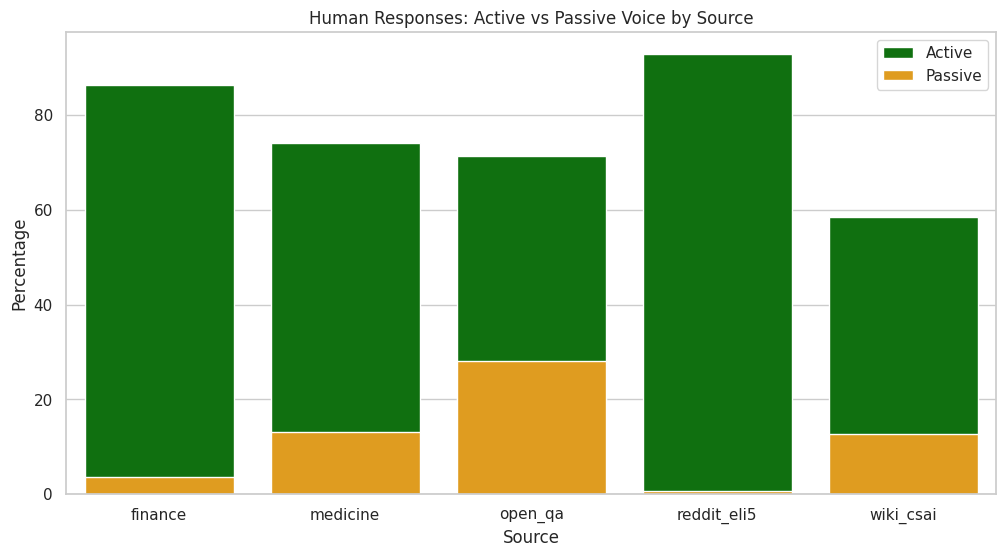

In [ ]:
plt.figure(figsize=(12, 6))

# Human Active vs Passive by Source
sns.barplot(x='source', y='human_active_percent', data=source_grouped, color='green', label='Active')
sns.barplot(x='source', y='human_passive_percent', data=source_grouped, color='orange', label='Passive')

plt.title('Human Responses: Active vs Passive Voice by Source')
plt.ylabel('Percentage')
plt.xlabel('Source')
plt.legend()

plt.show()

In [ ]:
###checkpoint

df.to_csv('df_passive_active.csv', index=False)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

from transformers import BertTokenizer, BertModel
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

def get_most_attended_word(sentence, model, tokenizer):
    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt", add_special_tokens=True, truncation=True, max_length=512)
    token_ids = inputs['input_ids']

    # Get model output including attentions
    outputs = model(**inputs)
    attentions = outputs.attentions

    # Aggregate attention over all layers and heads
    attention = torch.stack(attentions).mean(dim=0).mean(dim=1).squeeze()

    # Exclude [CLS] and [SEP] special tokens
    attention = attention[:, 1:-1]

    # Find the token index with the highest average attention
    max_attn_index = torch.argmax(attention.mean(dim=1)).item()

    # Decode the token back to the word
    most_attended_word = tokenizer.decode(token_ids[0][max_attn_index + 1])  # Adjust index for [CLS]

    return most_attended_word

# Example usage




# Apply the function to GPT and human response columns
df['gpt_most_attended_words'] = df['chatgpt_answers'].apply(lambda x: get_most_attended_word(x, model, tokenizer))
df['human_most_attended_words'] = df['human_answers'].apply(lambda x: get_most_attended_word(x, model, tokenizer))

# Display the results
print(df[['gpt_most_attended_words', 'human_most_attended_words']])


      gpt_most_attended_words human_most_attended_words
0                       n e w               p r e t t y
1                       i c e                     u s e
2                     s o m e                 b u n c h
3                         i s                         n
4                       l o t                 w h o l e
...                       ...                       ...
21663                   o n e             r e l a t e d
21664       t y p i c a l l y       a t t a c h m e n t
21665                     i s                 g i v e n
21666               p u l s e                   p a c e
21667               b r e a k                   b a c k

[21668 rows x 2 columns]


In [ ]:
###checkpoint

df.to_csv('df_passive_active_attention.csv', index=False)


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_passive_active.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)


<ipython-input-1-589128e18c92>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_passive_active.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-1-589128e18c92>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_passive_active.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

# 5 - Gerado por IA

In [ ]:
## detect ai generated text
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("Hello-SimpleAI/chatgpt-detector-roberta")
model = AutoModelForSequenceClassification.from_pretrained("Hello-SimpleAI/chatgpt-detector-roberta")
def detect_ai_text(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return predictions[:, 1].item()  # Probability of being AI-generated

# Apply to your DataFrame
df['ai_generated_probability_human'] = df['human_answers'].apply(lambda x: detect_ai_text(x, model, tokenizer))
df['ai_generated_probability_gpt'] = df['chatgpt_answers'].apply(lambda x: detect_ai_text(x, model, tokenizer))

df.to_csv('df_ai_detection.csv', index=False)


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_ai_detection.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)


<ipython-input-5-286adfebc96b>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_ai_detection.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-5-286adfebc96b>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_ai_detection.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

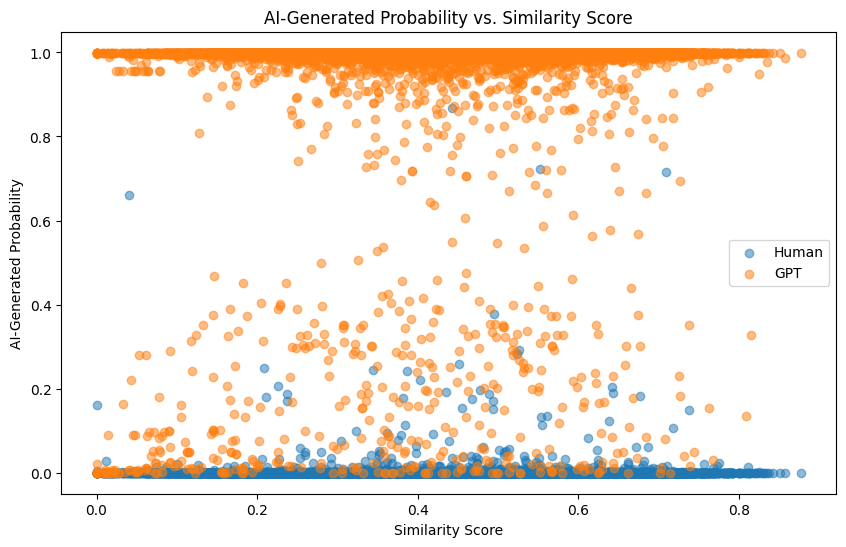

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['similarity'], df['ai_generated_probability_human'], alpha=0.5, label='Human')
plt.scatter(df['similarity'], df['ai_generated_probability_gpt'], alpha=0.5, label='GPT')
plt.title('AI-Generated Probability vs. Similarity Score')
plt.xlabel('Similarity Score')
plt.ylabel('AI-Generated Probability')
plt.legend()
plt.show()


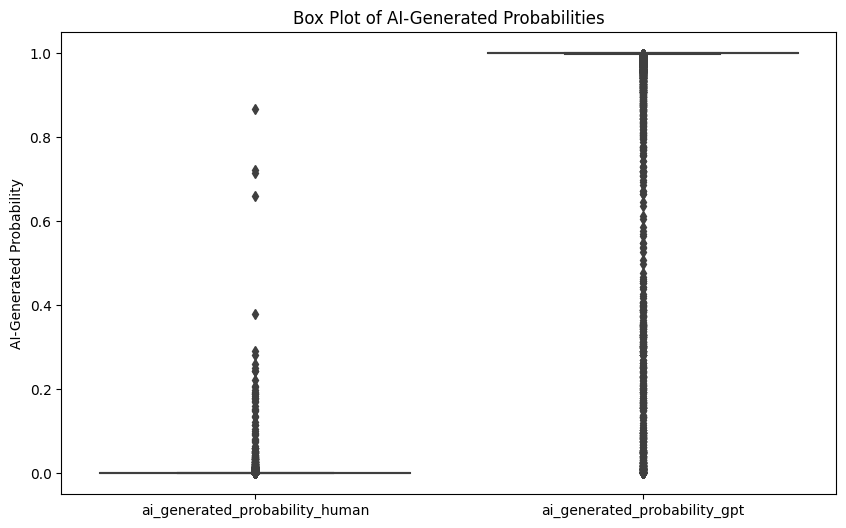

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['ai_generated_probability_human', 'ai_generated_probability_gpt']])
plt.title('Box Plot of AI-Generated Probabilities')
plt.ylabel('AI-Generated Probability')
plt.show()


# 5.1 Predição incorreta

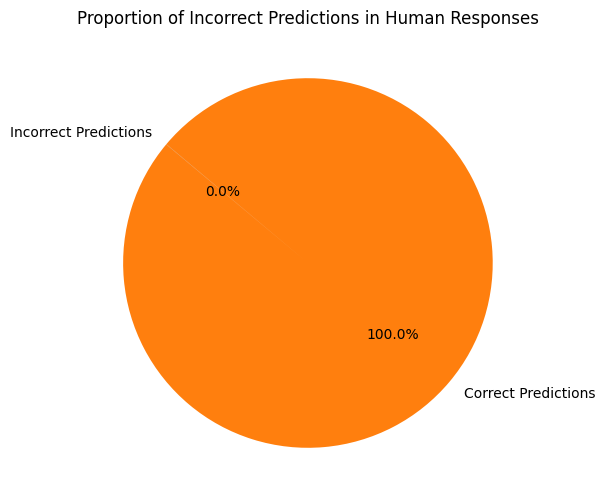

In [ ]:
#visualize how many false positives
import matplotlib.pyplot as plt
import seaborn as sns

# Define a threshold for incorrect predictions
threshold = 0.5

# Filter the DataFrame for human responses with high AI probability
incorrect_human = df[df['ai_generated_probability_human'] > threshold]

# Count the number of incorrect instances
incorrect_count = len(incorrect_human)

# Total human responses for comparison
total_human_responses = len(df['ai_generated_probability_human'])

# Data for plotting
labels = ['Incorrect Predictions', 'Correct Predictions']
sizes = [incorrect_count, total_human_responses - incorrect_count]

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Incorrect Predictions in Human Responses')
plt.show()



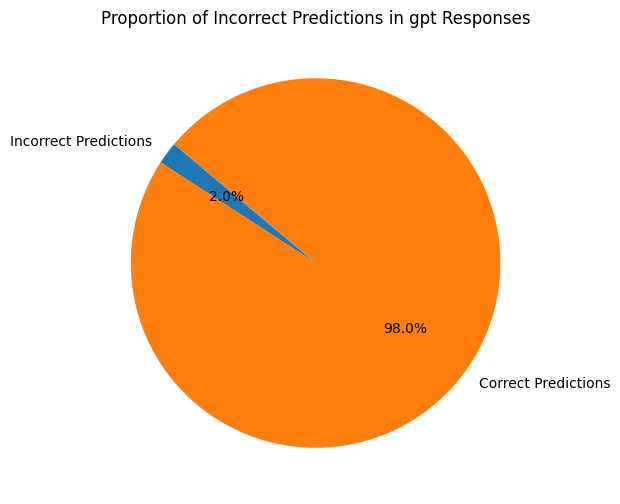

In [ ]:
#visualize how many incorrect
import matplotlib.pyplot as plt
import seaborn as sns

# Define a threshold for incorrect predictions
threshold = 0.5

# Filter the DataFrame for human responses with high AI probability
incorrect_gpt = df[df['ai_generated_probability_gpt'] < threshold]

# Count the number of incorrect instances
incorrect_count = len(incorrect_gpt)

# Total human responses for comparison
total_gpt_responses = len(df['ai_generated_probability_human'])

# Data for plotting
labels = ['Incorrect Predictions', 'Correct Predictions']
sizes = [incorrect_count, total_gpt_responses - incorrect_count]

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Incorrect Predictions in gpt Responses')
plt.show()

In [ ]:
print(df.columns)

Index(['question', 'human_answers', 'chatgpt_answers', 'source',
       'gpt_sentiment', 'human_sentiment', 'similarity', 'gpt_passive_voice',
       'human_passive_voice', 'gpt_active_voice', 'human_active_voice',
       'gpt_active_count', 'human_active_count', 'gpt_active_dominant',
       'gpt_passive_dominant', 'human_active_dominant',
       'human_passive_dominant', 'ai_generated_probability_human',
       'ai_generated_probability_gpt'],
      dtype='object')


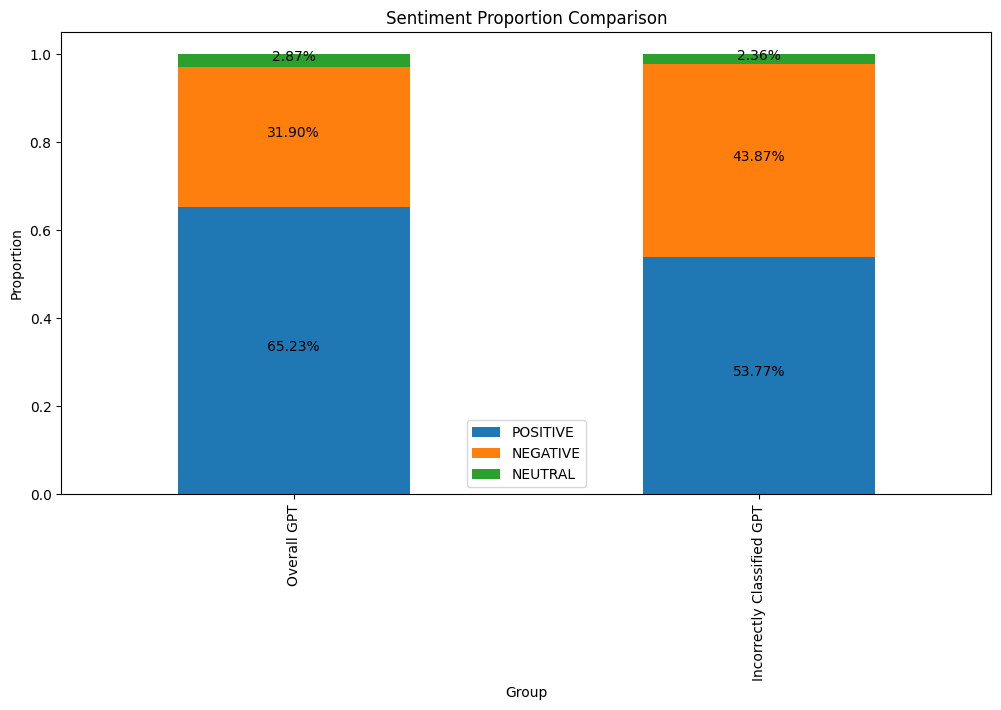

In [ ]:
# Creating a DataFrame for visualization
vis_df = pd.DataFrame({
    'Overall GPT': df['gpt_sentiment'].value_counts(normalize=True),
    'Incorrectly Classified GPT': incorrect_gpt['gpt_sentiment'].value_counts(normalize=True)
}).transpose()

# Plotting Stacked Bar Chart
ax = vis_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Proportion Comparison')
plt.xlabel('Group')
plt.ylabel('Proportion')
plt.legend(['POSITIVE', 'NEGATIVE', 'NEUTRAL'])

# Adding Percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center')

plt.show()


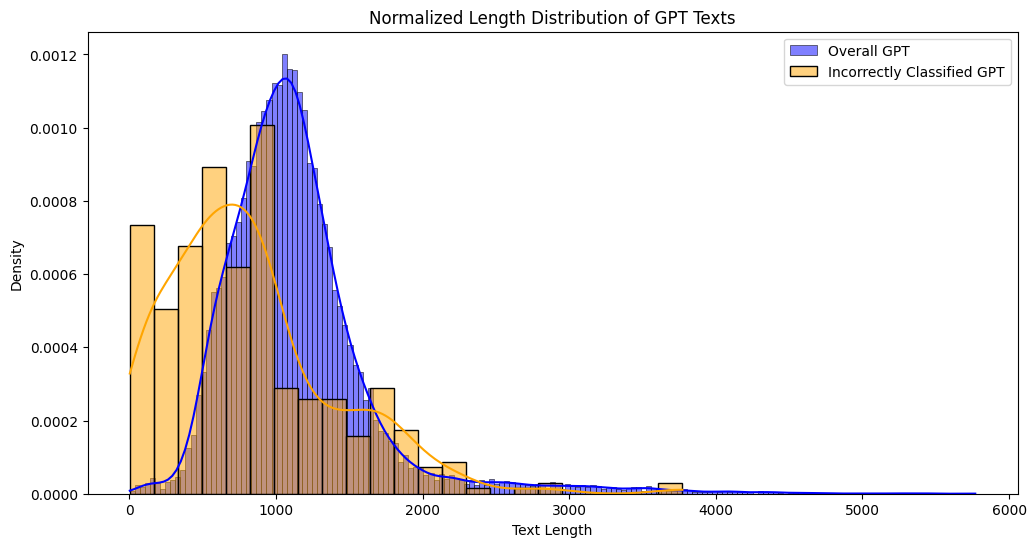

In [ ]:
# Normalized Histogram Plotting
plt.figure(figsize=(12, 6))
sns.histplot(df['gpt_text_length'], color='blue', label='Overall GPT', kde=True, stat="density")
sns.histplot(incorrect_gpt['incorrect_gpt_text_length'], color='orange', label='Incorrectly Classified GPT', kde=True, stat="density")

plt.title('Normalized Length Distribution of GPT Texts')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()


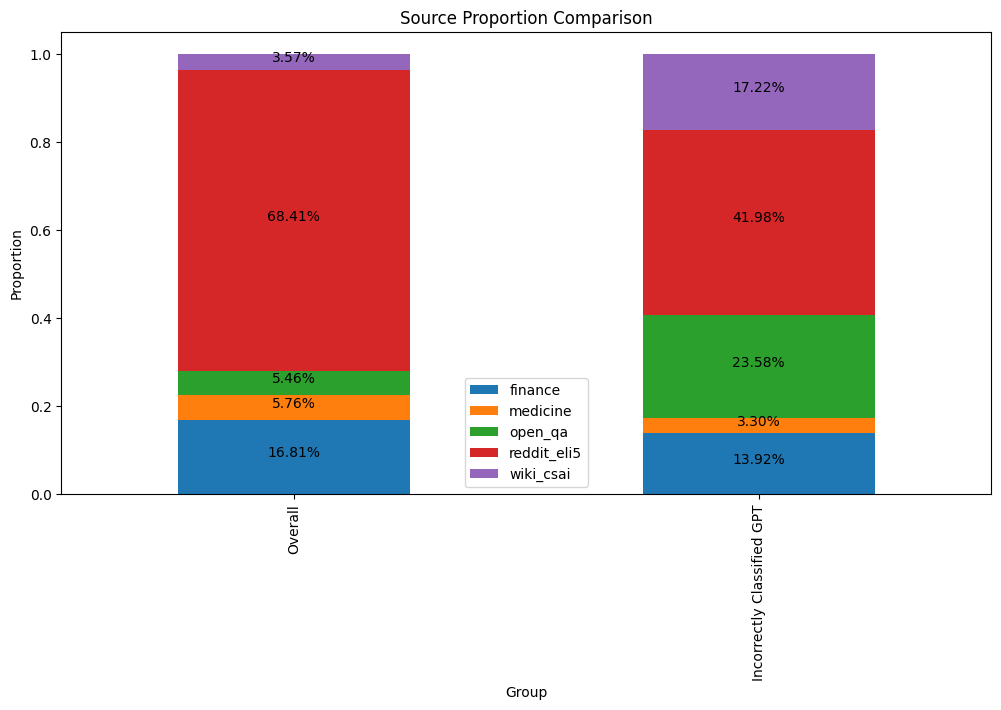

In [ ]:
# Count the proportion of each source
source_counts = df['source'].value_counts(normalize=True)
incorrect_source_counts = incorrect_gpt['source'].value_counts(normalize=True)

# Creating a DataFrame for visualization
source_vis_df = pd.DataFrame({
    'Overall': source_counts,
    'Incorrectly Classified GPT': incorrect_source_counts
}).transpose()

# Plotting Stacked Bar Chart
ax = source_vis_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Source Proportion Comparison')
plt.xlabel('Group')
plt.ylabel('Proportion')

# Adding Percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center')

plt.show()


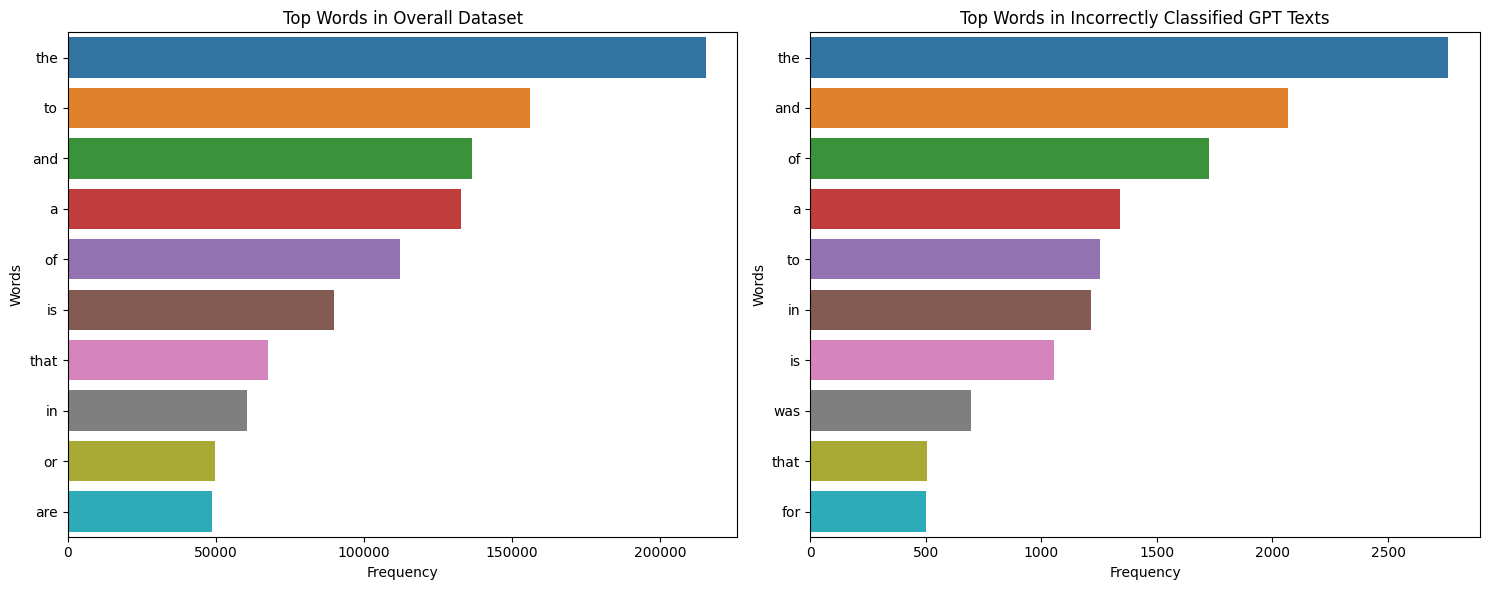

In [ ]:
from collections import Counter

# Assuming you have a function to extract words
def extract_words(text):
    return text.split()  # Simple word split, adjust as necessary

# Get most common words in the overall dataset and the incorrectly classified GPT texts
all_words = [word for text in df['chatgpt_answers'] for word in extract_words(text)]
incorrect_words = [word for text in incorrect_gpt['chatgpt_answers'] for word in extract_words(text)]

# Count the words
all_word_counts = Counter(all_words)
incorrect_word_counts = Counter(incorrect_words)

# Get top N words
top_n = 10
top_all_words = dict(all_word_counts.most_common(top_n))
top_incorrect_words = dict(incorrect_word_counts.most_common(top_n))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overall dataset
sns.barplot(ax=axes[0], x=list(top_all_words.values()), y=list(top_all_words.keys()))
axes[0].set_title('Top Words in Overall Dataset')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

# Incorrectly classified GPT texts
sns.barplot(ax=axes[1], x=list(top_incorrect_words.values()), y=list(top_incorrect_words.keys()))
axes[1].set_title('Top Words in Incorrectly Classified GPT Texts')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Words')

plt.tight_layout()
plt.show()


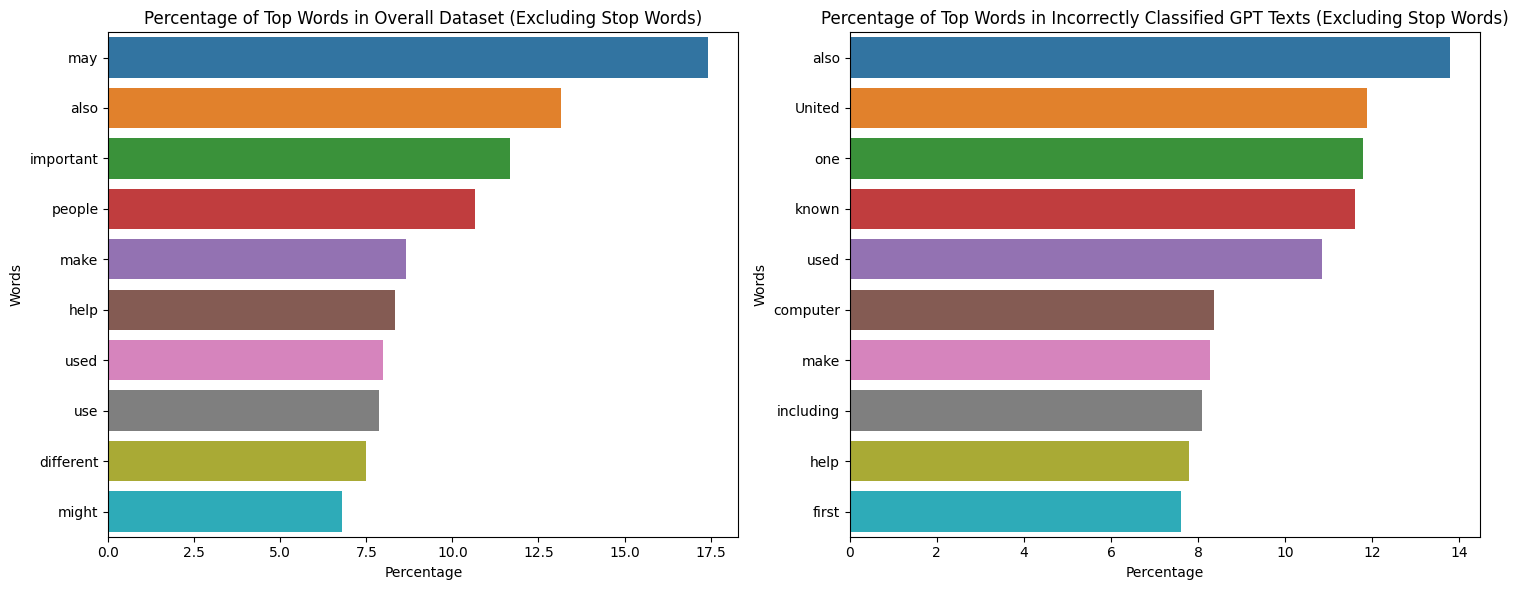

In [ ]:
# Get the sum of the top N word counts
sum_top_all_words = sum(top_all_words.values())
sum_top_incorrect_words = sum(top_incorrect_words.values())

# Calculate percentages
top_all_words_percent = {word: (count / sum_top_all_words * 100) for word, count in top_all_words.items()}
top_incorrect_words_percent = {word: (count / sum_top_incorrect_words * 100) for word, count in top_incorrect_words.items()}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overall dataset
sns.barplot(ax=axes[0], x=list(top_all_words_percent.values()), y=list(top_all_words_percent.keys()))
axes[0].set_title('Percentage of Top Words in Overall Dataset (Excluding Stop Words)')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Words')

# Incorrectly classified GPT texts
sns.barplot(ax=axes[1], x=list(top_incorrect_words_percent.values()), y=list(top_incorrect_words_percent.keys()))
axes[1].set_title('Percentage of Top Words in Incorrectly Classified GPT Texts (Excluding Stop Words)')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Words')

plt.tight_layout()
plt.show()


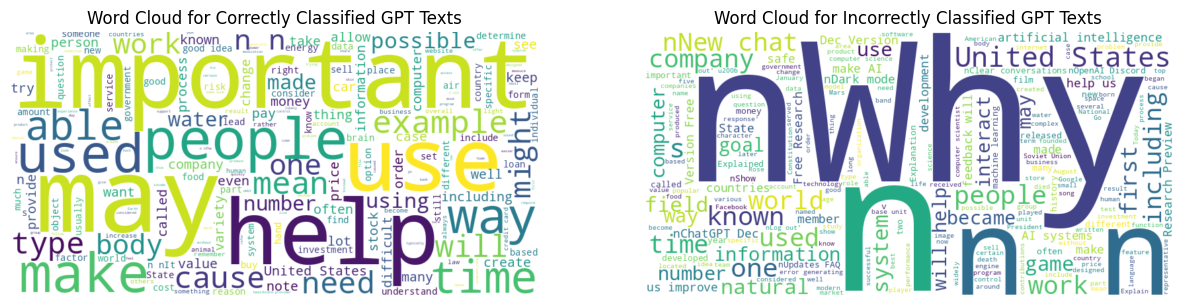

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to concatenate all texts
def concatenate_texts(texts):
    return " ".join(text for text in texts)

# Concatenate texts for correctly and incorrectly classified GPT texts
correct_gpt_texts = concatenate_texts(df[df['ai_generated_probability_gpt'] >= threshold]['chatgpt_answers'])
incorrect_gpt_texts = concatenate_texts(incorrect_gpt['chatgpt_answers'])

# Generate word clouds
wordcloud_correct = WordCloud(width=800, height=400, background_color='white').generate(correct_gpt_texts)
wordcloud_incorrect = WordCloud(width=800, height=400, background_color='white').generate(incorrect_gpt_texts)

# Display the word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_correct, interpolation='bilinear')
plt.title('Word Cloud for Correctly Classified GPT Texts')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_incorrect, interpolation='bilinear')
plt.title('Word Cloud for Incorrectly Classified GPT Texts')
plt.axis('off')

plt.show()


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_ai_detection.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)


<ipython-input-1-286adfebc96b>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_ai_detection.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-1-286adfebc96b>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_ai_detection.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

# 6 - Depression

In [ ]:
##Depression
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("paulagarciaserrano/roberta-depression-detection")
model = AutoModelForSequenceClassification.from_pretrained("paulagarciaserrano/roberta-depression-detection")

def detect_depression(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Assuming the second index corresponds to depression probability
    return predictions[:, 1].item()  # Probability of depression

# Apply to your DataFrame (e.g., to the 'chatgpt_answers' column)
df['depression_probability_gpt'] = df['chatgpt_answers'].apply(lambda x: detect_depression(x, model, tokenizer))
df['depression_probability_human'] = df['human_answers'].apply(lambda x: detect_depression(x, model, tokenizer))

df.to_csv('df_depression.csv', index=False)


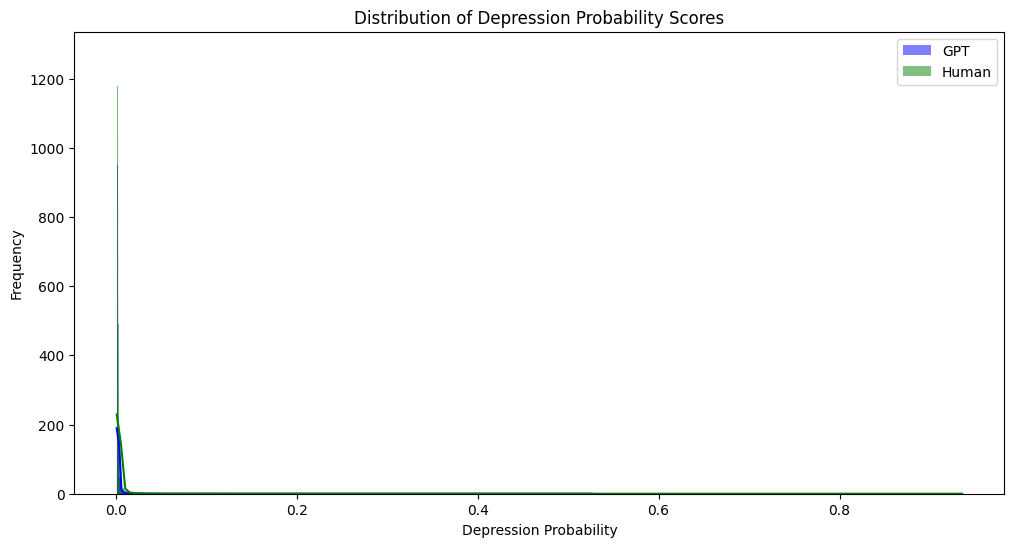

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['depression_probability_gpt'], color='blue', label='GPT', kde=True)
sns.histplot(df['depression_probability_human'], color='green', label='Human', kde=True)
plt.title('Distribution of Depression Probability Scores')
plt.xlabel('Depression Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Plotting with percentages
ax = avg_depression_per_source.plot(kind='bar', figsize=(10, 6))
plt.title('Average Depression Probability per Source')
plt.xlabel('Source')
bbplt.ylabel('Average Depression Probability')
plt.legend(['GPT', 'Human'])
plt.xticks(rotation=45)

# Adding percentage annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_depression.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)

<ipython-input-1-61fcb8baa9bc>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_depression.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-1-61fcb8baa9bc>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_depression.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

# 7 - Fakenews

In [ ]:
# Fake news detector
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("ghanashyamvtatti/roberta-fake-news")
model = AutoModelForSequenceClassification.from_pretrained("ghanashyamvtatti/roberta-fake-news")

def detect_fake_news(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Assuming the first index corresponds to fake news probability
    return predictions[:, 0].item()  # Probability of being fake news

# Apply to your DataFrame (e.g., to the 'chatgpt_answers' and 'human_answers' columns)
df['fake_news_probability_gpt'] = df['chatgpt_answers'].apply(lambda x: detect_fake_news(x, model, tokenizer))
df['fake_news_probability_human'] = df['human_answers'].apply(lambda x: detect_fake_news(x, model, tokenizer))

df.to_csv('df_fakenews.csv', index=False)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

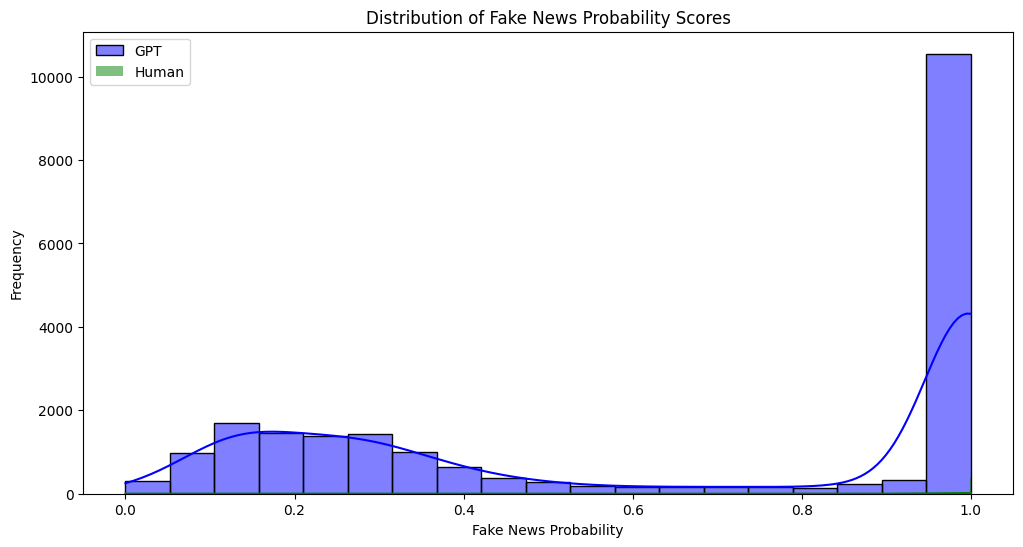

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['fake_news_probability_gpt'], color='blue', label='GPT', kde=True)
sns.histplot(df['fake_news_probability_human'], color='green', label='Human', kde=True)
plt.title('Distribution of Fake News Probability Scores')
plt.xlabel('Fake News Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()



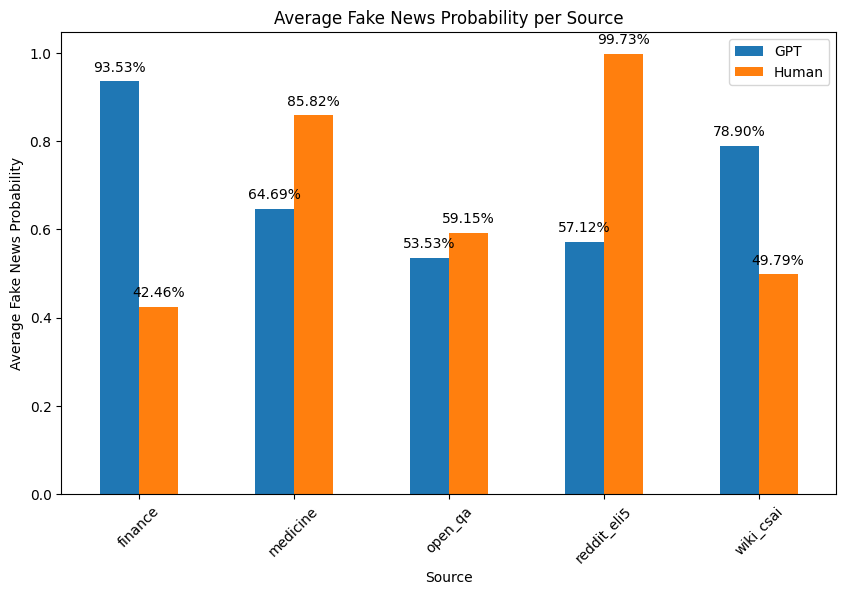

In [ ]:
avg_fake_news_per_source = df.groupby('source')[['fake_news_probability_gpt', 'fake_news_probability_human']].mean()
ax = avg_fake_news_per_source.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fake News Probability per Source')
plt.xlabel('Source')
plt.ylabel('Average Fake News Probability')
plt.legend(['GPT', 'Human'])
plt.xticks(rotation=45)

# Adding percentage annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
!pip uninstall transformers sentencepiece -y
!pip install --no-cache-dir transformers sentencepiece



Found existing installation: transformers 4.36.2
Uninstalling transformers-4.36.2:
  Successfully uninstalled transformers-4.36.2
Found existing installation: sentencepiece 0.1.99
Uninstalling sentencepiece-0.1.99:
  Successfully uninstalled sentencepiece-0.1.99
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_fakenews.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)


<ipython-input-15-dc15a5db6f78>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_fakenews.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-15-dc15a5db6f78>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_fakenews.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

# 9 - Commonsense

In [ ]:
## Commonsense
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("liujch1998/vera", use_fast=False)

model = AutoModelForSequenceClassification.from_pretrained("liujch1998/vera")

def check_commonsense(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return predictions[:, 1].item()  # Probability of text being commonsensical

df['commonsense_probability_gpt'] = df['chatgpt_answers'].apply(lambda x: check_commonsense(x, model, tokenizer))
df['commonsense_probability_human'] = df['human_answers'].apply(lambda x: check_commonsense(x, model, tokenizer))

df.to_csv('df_commonsense.csv', index=False)
from google.colab import files

files.download('df_commonsense.csv')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at liujch1998/vera and are newly initialized: ['decoder.block.10.layer.0.SelfAttention.q.weight', 'decoder.block.15.layer.1.EncDecAttention.k.weight', 'decoder.block.17.layer.0.SelfAttention.q.weight', 'decoder.block.22.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.12.layer.1.EncDecAttention.v.weight', 'decoder.block.14.layer.1.EncDecAttention.q.weight', 'decoder.block.16.layer.2.DenseReluDense.wo.weight', 'decoder.block.9.layer.1.EncDecAttention.k.weight', 'decoder.block.12.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.6.layer.2.DenseReluDense.wo.weight', 'decoder.block.20.layer.0.SelfAttention.v.weight', 'decoder.block.7.layer.1.layer_norm.weight', 'decoder.block.16.layer.0.SelfAttention.k.weight', 'decoder.block.12.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.3.layer.1.EncDecAttention.v.weight', 'decoder.block.8.layer.0.SelfAttentio

In [ ]:
# Calculate the average commonsense probability per source
avg_commonsense_per_source = df.groupby('source')['commonsense_probability_gpt', 'commonsense_probability_human'].mean()

# Plotting
ax = avg_commonsense_per_source.plot(kind='bar', figsize=(10, 6))
plt.title('Average Commonsense Probability per Source')
plt.xlabel('Source')
plt.ylabel('Average Commonsense Probability')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



In [ ]:
# Creating a comparison DataFrame
comparison_df = df[['source', 'commonsense_probability_gpt', 'fake_news_probability_gpt']].melt(id_vars='source', var_name='Type', value_name='Probability')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='source', y='Probability', hue='Type', data=comparison_df)
plt.title('Comparison of Different Probabilities per Source')
plt.ylabel('Probability')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean similarity for each source
source_avg_similarity = df.groupby('source')["similarity"].mean()

# Sort the average similarities in ascending order
source_ranking = source_avg_similarity.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=source_ranking.values, y=source_ranking.index, palette="viridis")
plt.title('Average Similarity by Source in HC3 Dataset')
plt.xlabel('Average Similarity')
plt.ylabel('Source')
plt.show()


# 10. Novas visualizações

<ipython-input-4-f160514d788e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_ranking.values, y=source_ranking.index, palette="viridis")


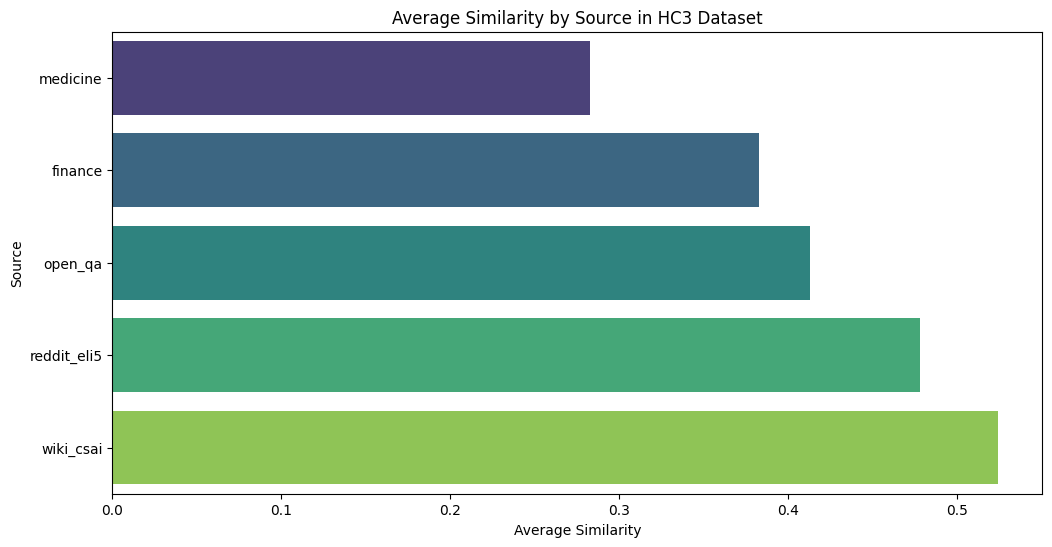

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean similarity for each source
source_avg_similarity = df.groupby('source')["similarity"].mean()

# Sort the average similarities in ascending order
source_ranking = source_avg_similarity.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=source_ranking.values, y=source_ranking.index, palette="viridis")
plt.title('Average Similarity by Source in HC3 Dataset')
plt.xlabel('Average Similarity')
plt.ylabel('Source')
plt.show()


In [ ]:
import nltk
from nltk import ngrams
from collections import Counter
import numpy as np

nltk.download('punkt')

def extract_word_ngrams(text, n):
    # Tokenize the text and filter out punctuation
    tokens = [word for word in nltk.word_tokenize(text) if word.isalpha()]

    # Generate n-grams
    word_ngrams = ngrams(tokens, n)

    return [' '.join(gram) for gram in word_ngrams]

# Specify the number of n-grams
n = 4

# Apply to your DataFrame
gpt_ngrams = extract_word_ngrams(' '.join(df['chatgpt_answers'].dropna()), n)
human_ngrams = extract_word_ngrams(' '.join(df['human_answers'].dropna()), n)

# Getting the top 10 4-grams and their counts
top_gpt_4grams = Counter(gpt_ngrams).most_common(10)
top_human_4grams = Counter(human_ngrams).most_common(10)

# Separate the 4-grams and their counts
gpt_4gram_labels, gpt_4gram_counts = zip(*top_gpt_4grams)
human_4gram_labels, human_4gram_counts = zip(*top_human_4grams)

# Calculate the total counts
total_gpt_counts = sum(gpt_4gram_counts)
total_human_counts = sum(human_4gram_counts)

# Calculate percentages
gpt_4gram_percentages = [count / total_gpt_counts * 100 for count in gpt_4gram_counts]
human_4gram_percentages = [count / total_human_counts * 100 for count in human_4gram_counts]

# Setting the positions and width for the bars
pos = np.arange(len(gpt_4gram_labels))
bar_width = 0.35

# Plotting the bar chart with percentages
plt.figure(figsize=(12, 6))

# Bars for GPT 4-grams
plt.bar(pos, gpt_4gram_percentages, bar_width, label=f'GPT {n}-grams', color='blue')

# Bars for Human 4-grams
plt.bar(pos + bar_width, human_4gram_percentages, bar_width, label=f'Human {n}-grams', color='green')

# Adding labels and title
plt.xticks(pos + bar_width / 2, gpt_4gram_labels, rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title(f'Top 10 Most Common Word {n}-grams for GPT and Human Responses (in percentages)')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


<ipython-input-7-6989d4b08231>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Percentage', data=gpt_sentiment_percentages, order=category_order, palette='viridis')


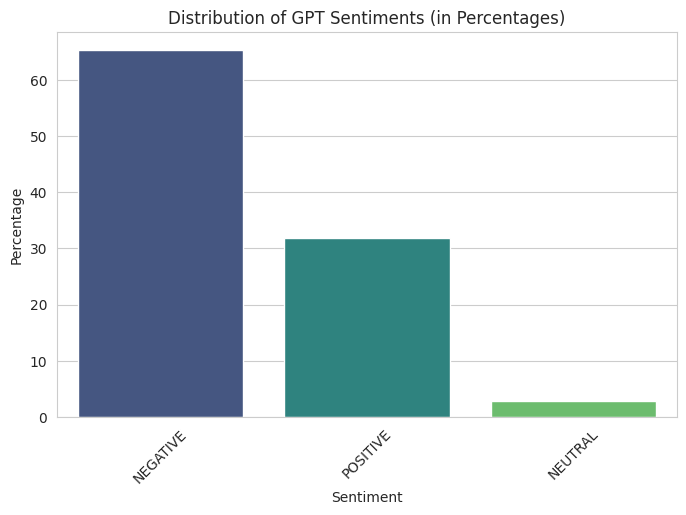

<ipython-input-7-6989d4b08231>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Percentage', data=human_sentiment_percentages, order=category_order, palette='viridis')


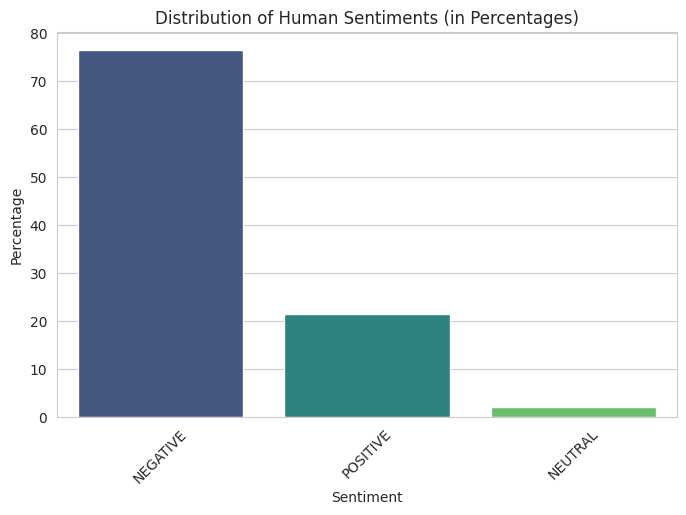

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the order of categories
category_order = ['NEGATIVE','POSITIVE','NEUTRAL']

# Calculate percentages for GPT sentiment
gpt_sentiment_percentages = (df['gpt_sentiment'].value_counts(normalize=True) * 100).reset_index()
gpt_sentiment_percentages.columns = ['Sentiment', 'Percentage']

# Distribution of GPT sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment', y='Percentage', data=gpt_sentiment_percentages, order=category_order, palette='viridis')
plt.title('Distribution of GPT Sentiments (in Percentages)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Calculate percentages for Human sentiment
human_sentiment_percentages = (df['human_sentiment'].value_counts(normalize=True) * 100).reset_index()
human_sentiment_percentages.columns = ['Sentiment', 'Percentage']

# Distribution of Human sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment', y='Percentage', data=human_sentiment_percentages, order=category_order, palette='viridis')
plt.title('Distribution of Human Sentiments (in Percentages)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-880e2d0a6583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Sentiment', y='Percentage', data=gpt_sentiment_percentages, order=category_order, palette='viridis')
<ipython-input-9-880e2d0a6583>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Sentiment', y='Percentage', data=human_sentiment_percentages, order=category_order, palette='viridis')


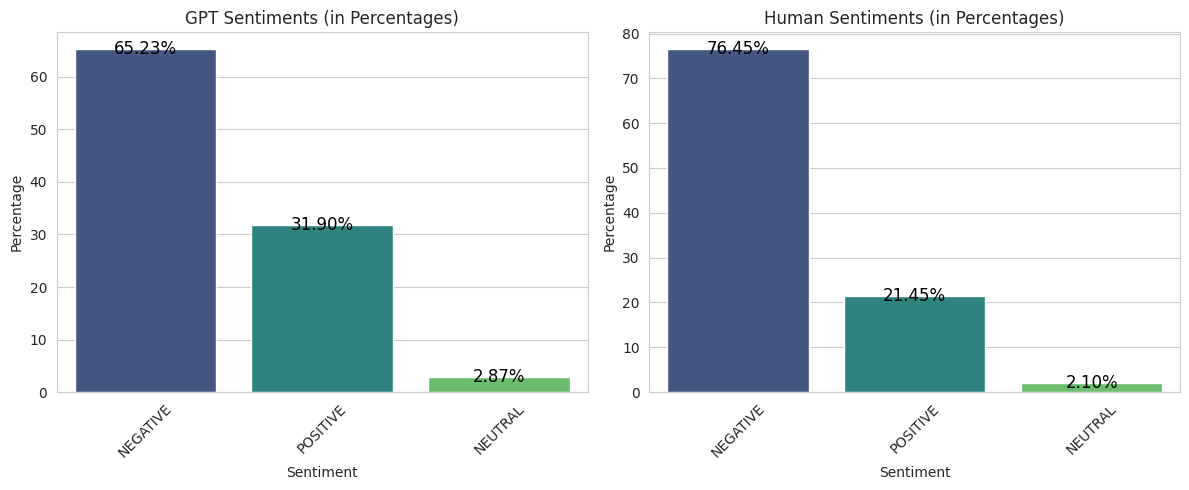

In [ ]:
# Create subplots for GPT and Human sentiments side by side
plt.figure(figsize=(12, 5))

# Subplot for GPT sentiment
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Sentiment', y='Percentage', data=gpt_sentiment_percentages, order=category_order, palette='viridis')
plt.title('GPT Sentiments (in Percentages)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Adding percentages on top of the bars for GPT sentiment
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black')

# Subplot for Human sentiment
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Sentiment', y='Percentage', data=human_sentiment_percentages, order=category_order, palette='viridis')
plt.title('Human Sentiments (in Percentages)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Adding percentages on top of the bars for Human sentiment
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black')

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
# Calculate the absolute difference in sentiment scores between GPT and Human
df['sentiment_difference'] = abs(df['gpt_sentiment_score'] - df['human_sentiment_score'])

# Calculate the mean sentiment difference for each source
source_avg_difference = df.groupby('source')['sentiment_difference'].mean()

# Sort the average differences in descending order
source_ranking = source_avg_difference.sort_values(ascending=False)

# Plot the ranking
plt.figure(figsize=(10, 6))
sns.barplot(x=source_ranking.values, y=source_ranking.index, palette='viridis')
plt.title('Sources with the Biggest Sentiment Differences (GPT vs. Human)')
plt.xlabel('Mean Absolute Sentiment Difference')
plt.ylabel('Source')
plt.show()


KeyError: 'gpt_sentiment_score'

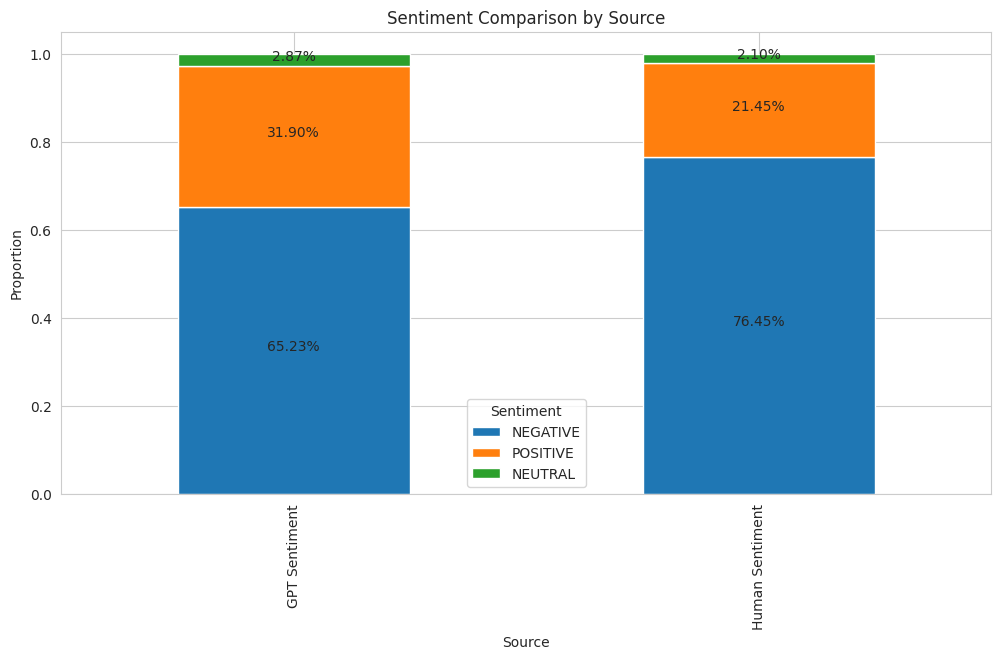

In [ ]:
# Create a DataFrame for visualization
vis_df = pd.DataFrame({
    'GPT Sentiment': df['gpt_sentiment'].value_counts(normalize=True),
    'Human Sentiment': df['human_sentiment'].value_counts(normalize=True)
}).transpose()

# Plot a stacked bar chart
ax = vis_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Comparison by Source')
plt.xlabel('Source')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')

# Adding percentages to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center')

plt.show()


<ipython-input-18-788ac5e2f10b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='coolwarm')


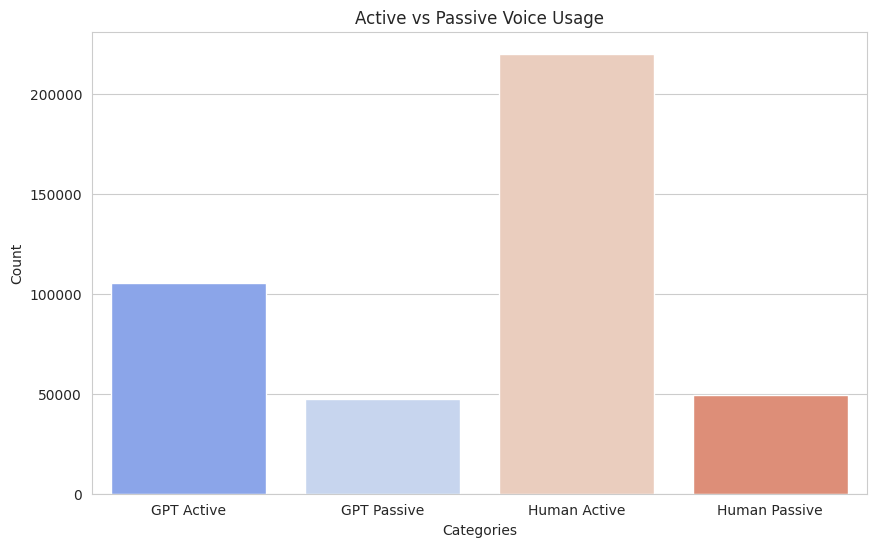

In [ ]:
# Counting the occurrences
gpt_active_count = df['gpt_active_voice'].sum()
gpt_passive_count = df['gpt_passive_voice'].sum()
human_active_count = df['human_active_voice'].sum()
human_passive_count = df['human_passive_voice'].sum()

import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
categories = ['GPT Active', 'GPT Passive', 'Human Active', 'Human Passive']
counts = [gpt_active_count, gpt_passive_count, human_active_count, human_passive_count]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Creating the bar plot
sns.barplot(x=categories, y=counts, palette='coolwarm')

# Adding titles and labels
plt.title('Active vs Passive Voice Usage')
plt.ylabel('Count')
plt.xlabel('Categories')

# Show the plot
plt.show()


<ipython-input-19-d2103668078a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=percentages, palette='coolwarm')


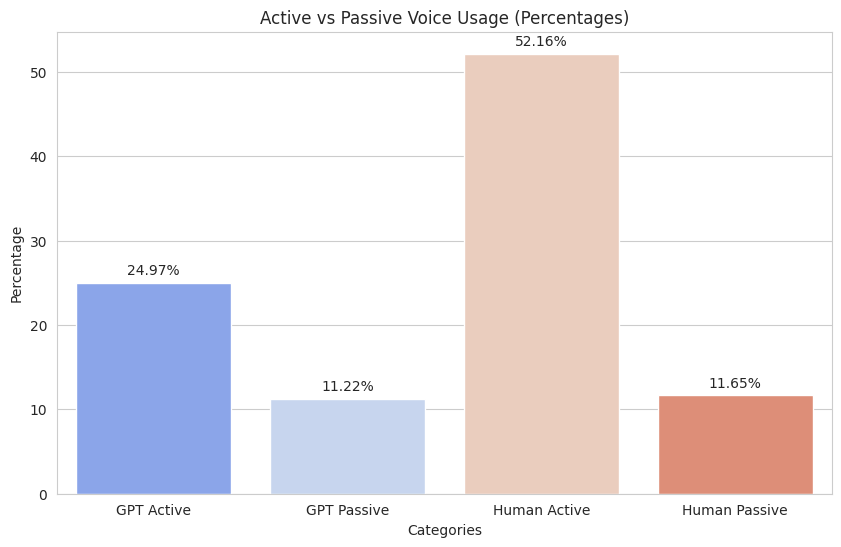

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
categories = ['GPT Active', 'GPT Passive', 'Human Active', 'Human Passive']
counts = [gpt_active_count, gpt_passive_count, human_active_count, human_passive_count]

# Calculate percentages
total_count = sum(counts)
percentages = [count / total_count * 100 for count in counts]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Creating the bar plot with percentages
sns.barplot(x=categories, y=percentages, palette='coolwarm')

# Adding percentages on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

# Adding titles and labels
plt.title('Active vs Passive Voice Usage (Percentages)')
plt.ylabel('Percentage')
plt.xlabel('Categories')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_fakenews.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)


<ipython-input-14-6783b737cc48>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_fakenews.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-14-6783b737cc48>:7: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_fakenews.csv', error_bad_lines=False, warn_bad_lines=True)


In [ ]:

# Adicione a coluna de comprimento da resposta do GPT
df['gpt_response_length'] = df['chatgpt_answers'].apply(lambda x: len(x))

# Criando o gráfico interativo com Plotly
fig = px.scatter(df, x='gpt_response_length', y='similarity',
                 hover_data=['chatgpt_answers', 'human_answers'],
                 title='GPT Response Length vs. Similarity Score',
                 labels={'gpt_response_length': 'GPT Response Length', 'similarity': 'Similarity Score'})

fig.show()


In [ ]:
df['gpt_response_length'] = df['chatgpt_answers'].apply(len)
df['human_response_length'] = df['human_answers'].apply(len)
df['total_length'] = df['gpt_response_length'] + df['human_response_length']
df['gpt_response_proportion'] = df['gpt_response_length'] / df['total_length']

# Criando o gráfico interativo com Plotly
fig = px.scatter(df, x='gpt_response_proportion', y='similarity',
                 hover_data=['chatgpt_answers', 'human_answers'],
                 title='GPT Response Proportion vs. Similarity Score',
                 labels={'gpt_response_proportion': 'GPT Response Proportion', 'similarity': 'Similarity Score'})

fig.show()

In [ ]:
# Calculando o comprimento proporcional das respostas do GPT
df['gpt_response_length'] = df['chatgpt_answers'].apply(len)
df['human_response_length'] = df['human_answers'].apply(len)
df['total_length'] = df['gpt_response_length'] + df['human_response_length']
df['gpt_response_proportion'] = df['gpt_response_length'] / df['total_length']

# Criando o gráfico interativo com Plotly
fig = px.scatter(df, x='gpt_response_proportion', y='similarity',
                 hover_data=['chatgpt_answers', 'human_answers'],
                 title='GPT Response Proportion vs. Similarity Score',
                 labels={'gpt_response_proportion': 'GPT Response Proportion', 'similarity': 'Similarity Score'})

# Mostrando o gráfico
fig.show()

# 10 - outros modelos

In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_depression.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)

<ipython-input-1-61fcb8baa9bc>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_depression.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-1-61fcb8baa9bc>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_depression.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd

# Carregar o tokenizer e o modelo
tokenizer = AutoTokenizer.from_pretrained("aliosm/ComVE-gpt2-medium")
model = AutoModelForSequenceClassification.from_pretrained("aliosm/ComVE-gpt2-medium")

# Criar uma pipeline para classificação de sequências
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

def check_commonsense(text, model, tokenizer):
    # Truncar o texto para um número máximo de caracteres
    # 512 caracteres é uma estimativa razoável para ficar abaixo do limite de 1024 tokens
    truncated_text = text[:512]
    # Processar o texto truncado através da pipeline
    results = pipe(truncated_text)
    # Supondo que a primeira pontuação seja a probabilidade de senso comum
    commonsense_probability = results[0][0]['score']
    return commonsense_probability


df['commonsense_probability_gpt'] = df['chatgpt_answers'].apply(lambda x: check_commonsense(x, model, tokenizer))
df['commonsense_probability_human'] = df['human_answers'].apply(lambda x: check_commonsense(x, model, tokenizer))

# Salvar em CSV
df.to_csv('df_commonsense_probability.csv', index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at aliosm/ComVE-gpt2-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd

# Carregar o tokenizer e o modelo
tokenizer = AutoTokenizer.from_pretrained("jy46604790/Fake-News-Bert-Detect")
model = AutoModelForSequenceClassification.from_pretrained("jy46604790/Fake-News-Bert-Detect")

# Criar uma pipeline para classificação de sequências, usando top_k=None
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, top_k=None)

def detect_fake_news(text, model, tokenizer):
    # Truncar o texto para um número seguro de caracteres, considerando a conversão em tokens
    safe_length = 400  # Um número menor para ajudar a manter-se dentro do limite de tokens
    truncated_text = text[:safe_length]

    # Processar o texto truncado através da pipeline
    results = pipe(truncated_text)

    # Supondo que o modelo retorna pontuações para 'FAKE' e 'REAL'
    fake_news_probability = results[0][0]['score']
    return fake_news_probability


df['fake_news_probability_gpt'] = df['chatgpt_answers'].apply(lambda x: detect_fake_news(x, model, tokenizer))
df['fake_news_probability_human'] = df['human_answers'].apply(lambda x: detect_fake_news(x, model, tokenizer))

# Salvar em CSV
df.to_csv('df_fake_news_detection.csv', index=False)


Token indices sequence length is longer than the specified maximum sequence length for this model (782 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The expanded size of the tensor (782) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 782].  Tensor sizes: [1, 514]

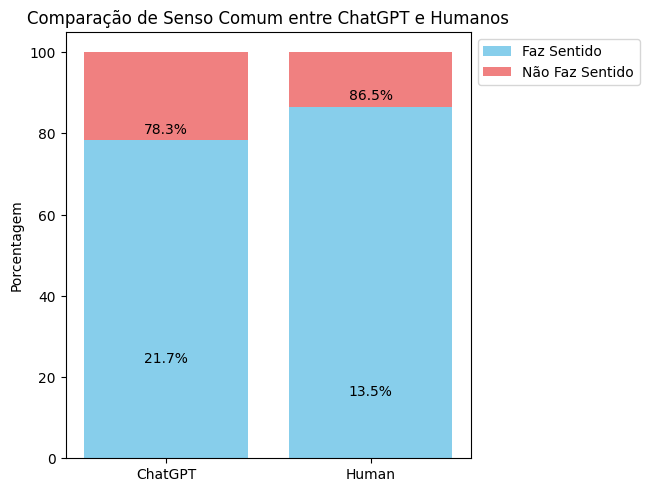

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definir cores
cores = [mcolors.CSS4_COLORS['skyblue'], mcolors.CSS4_COLORS['lightcoral']]

porcentagem_senso_gpt = (df['commonsense_probability_gpt'] > limiar).mean() * 100
porcentagem_nao_senso_gpt = 100 - porcentagem_senso_gpt

porcentagem_senso_human = (df['commonsense_probability_human'] > limiar).mean() * 100
porcentagem_nao_senso_human = 100 - porcentagem_senso_human


# Criar gráfico de barras empilhadas
fig, ax = plt.subplots()
barra1 = ax.bar(categorias, senso, color=cores[0], label='Faz Sentido')
barra2 = ax.bar(categorias, nao_senso, bottom=senso, color=cores[1], label='Não Faz Sentido')

# Adicionar porcentagens no gráfico
for barra in [barra1, barra2]:
    for rect in barra:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Deslocamento vertical das etiquetas
                    textcoords="offset points",
                    ha='center', va='bottom')

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ... [resto do seu código para gerar o gráfico] ...

# Ajustar a posição da legenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Posiciona a legenda fora do gráfico

# Ajustar layout para acomodar a legenda
plt.tight_layout()


# Adicionar legendas e títulos
ax.set_ylabel('Porcentagem')
ax.set_title('Comparação de Senso Comum entre ChatGPT e Humanos')

# Mostrar o gráfico
plt.show()


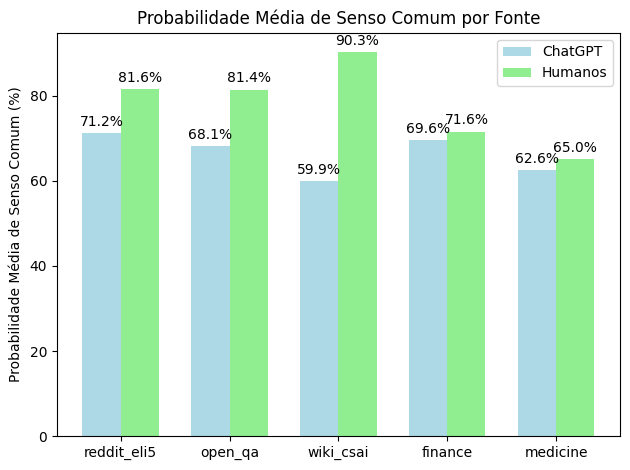

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponha que 'sources' são as diferentes fontes em sua coluna 'source'
sources = df['source'].unique()

# Calcular as médias das probabilidades para ChatGPT e humanos
avg_prob_gpt = df.groupby('source')['commonsense_probability_gpt'].mean() * 100
avg_prob_human = df.groupby('source')['commonsense_probability_human'].mean() * 100

# Preparar o gráfico
x = np.arange(len(sources))  # as localizações dos grupos
width = 0.35  # largura das barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_prob_gpt, width, label='ChatGPT', color='lightblue')
rects2 = ax.bar(x + width/2, avg_prob_human, width, label='Humanos', color='lightgreen')

# Adicionar rótulos, título e rótulos personalizados no eixo X
ax.set_ylabel('Probabilidade Média de Senso Comum (%)')
ax.set_title('Probabilidade Média de Senso Comum por Fonte')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()

# Função para adicionar rótulos nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adicionar rótulos nas barras
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
count = 0
try:
    df = pd.read_csv('df_commonsense_probability.csv', error_bad_lines=False, warn_bad_lines=True)
except Exception as e:
    print("Error reading CSV:", e)
    count = count + 1

print(df)
print(count)

<ipython-input-5-843147b4fae3>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_commonsense_probability.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-5-843147b4fae3>:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('df_commonsense_probability.csv', error_bad_lines=False, warn_bad_lines=True)


                                                question  \
0      Why is every book I hear about a " NY Times # ...   
1      If salt is so bad for cars , why do we use it ...   
2      Why do we still have SD TV channels when HD lo...   
3      Why has nobody assassinated Kim Jong - un He i...   
4      How was airplane technology able to advance so...   
...                                                  ...   
21663  Is rise in pressure from 116/66 to 140/80 norm...   
21664  What could cause a painless lump in the right ...   
21665  Can Acutret be given to a child for treatment ...   
21666  Are BP of 119/65 and pulse of 35 causes for co...   
21667  Suggest treatment for back pain after walking ...   

                                           human_answers  \
0      ['Basically there are many categories of " Bes...   
1      ['salt is good for not dying in car crashes an...   
2      ["The way it works is that old TV stations got...   
3      ["You ca n't just go around assa

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


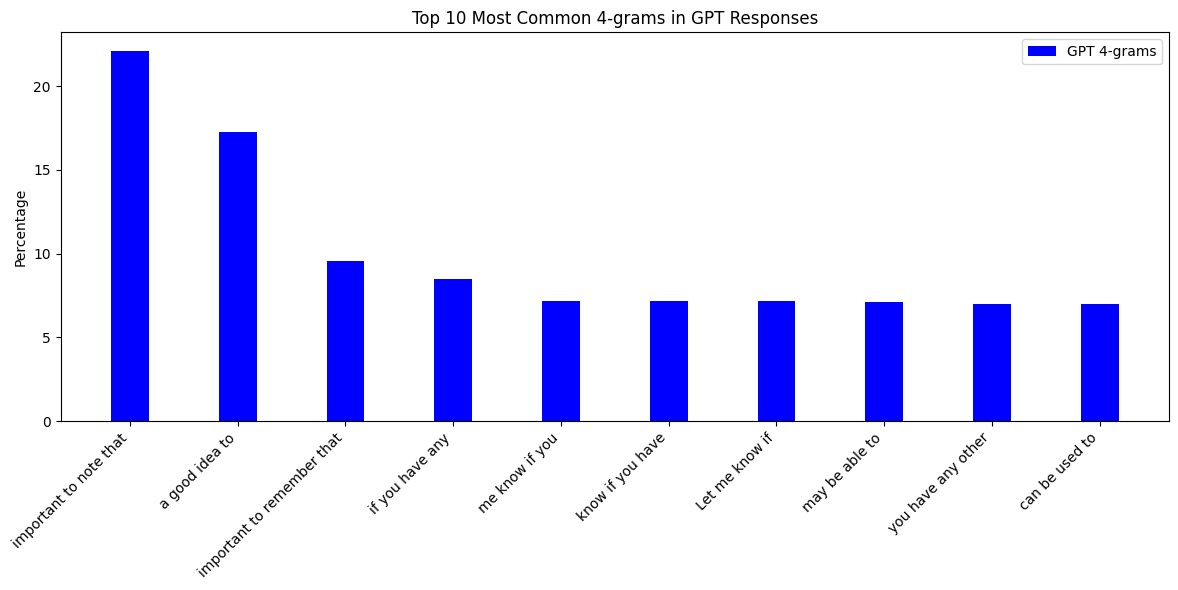

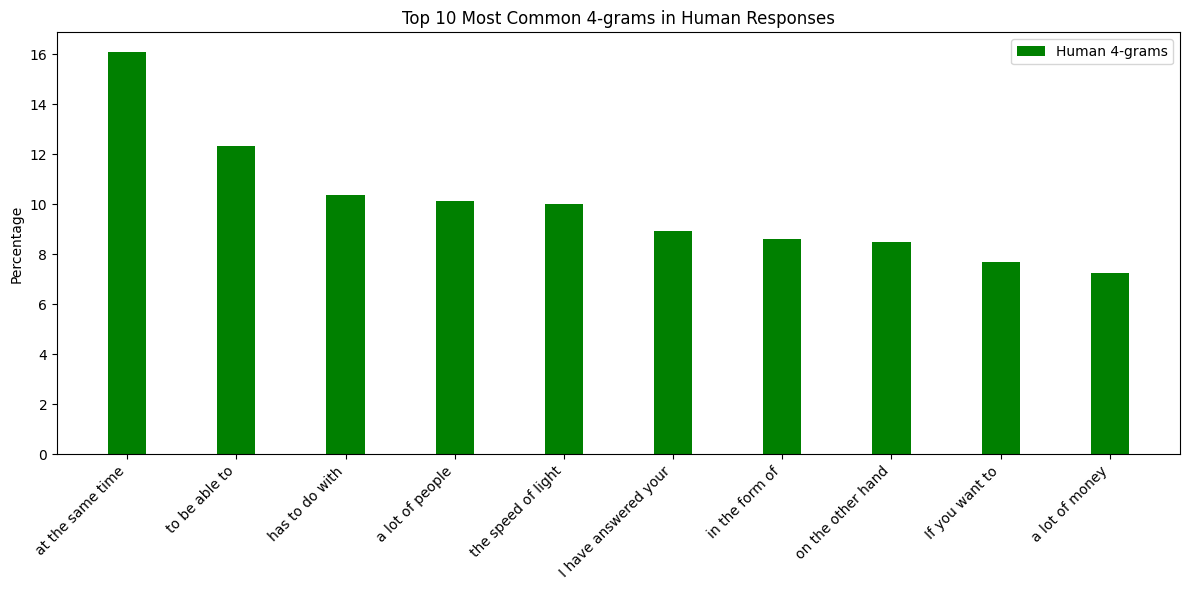

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import ngrams
from collections import Counter
import numpy as np

nltk.download('punkt')

def extract_word_ngrams(text, n):
    tokens = [word for word in nltk.word_tokenize(text) if word.isalpha()]
    word_ngrams = ngrams(tokens, n)
    return [' '.join(gram) for gram in word_ngrams]

# Especificando o número de n-grams
n = 4

# Aplicando ao DataFrame
gpt_ngrams = extract_word_ngrams(' '.join(df['chatgpt_answers'].dropna()), n)
human_ngrams = extract_word_ngrams(' '.join(df['human_answers'].dropna()), n)

# Obtendo e filtrando os 4-grams mais comuns
gpt_counter = Counter(gpt_ngrams)
human_counter = Counter(human_ngrams)

top_gpt_4grams = {gram: count for gram, count in gpt_counter.most_common(20) if not any(gram in other_gram for other_gram in gpt_counter if other_gram != gram)}
top_human_4grams = {gram: count for gram, count in human_counter.most_common(20) if not any(gram in other_gram for other_gram in human_counter if other_gram != gram)}

# Pegando os top 10 após a filtragem
top_gpt_4grams = list(top_gpt_4grams.items())[:10]
top_human_4grams = list(top_human_4grams.items())[:10]

# Convertendo contagens em porcentagens
total_gpt_counts = sum(count for _, count in top_gpt_4grams)
total_human_counts = sum(count for _, count in top_human_4grams)
gpt_4gram_percentages = [(count / total_gpt_counts * 100) for _, count in top_gpt_4grams]
human_4gram_percentages = [(count / total_human_counts * 100) for _, count in top_human_4grams]

# Configurando as posições e a largura para as barras
pos = np.arange(len(top_gpt_4grams))
bar_width = 0.35

# Plotando o gráfico de barras para GPT 4-grams
plt.figure(figsize=(12, 6))
gpt_4gram_labels, _ = zip(*top_gpt_4grams)
plt.bar(pos, gpt_4gram_percentages, bar_width, label='GPT 4-grams', color='blue')
plt.xticks(pos, gpt_4gram_labels, rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common 4-grams in GPT Responses')
plt.legend()
plt.tight_layout()
plt.show()

# Plotando o gráfico de barras para Human 4-grams
plt.figure(figsize=(12, 6))
human_4gram_labels, _ = zip(*top_human_4grams)
plt.bar(pos, human_4gram_percentages, bar_width, label='Human 4-grams', color='green')
plt.xticks(pos, human_4gram_labels, rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common 4-grams in Human Responses')
plt.legend()
plt.tight_layout()
plt.show()


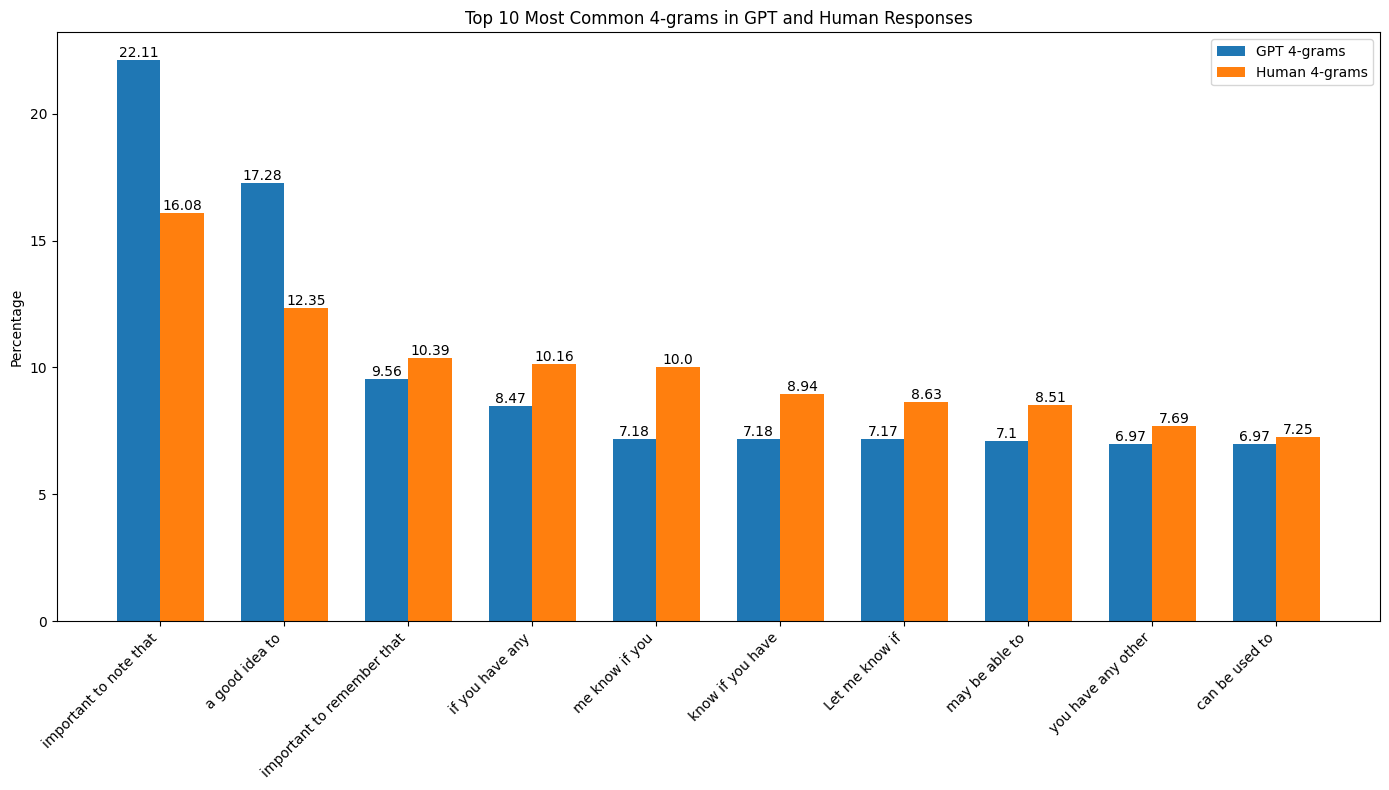

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponha que gpt_4gram_labels, gpt_4gram_percentages, human_4gram_labels e human_4gram_percentages
# sejam as variáveis obtidas anteriormente

pos = np.arange(len(gpt_4gram_labels))
bar_width = 0.35

# Cores personalizadas
gpt_color = '#1f77b4'  # Um tom de azul
human_color = '#ff7f0e'  # Um tom de laranja

# Plotando o gráfico de barras para GPT 4-grams
plt.figure(figsize=(14, 8))
gpt_bars = plt.bar(pos - bar_width/2, gpt_4gram_percentages, bar_width, label='GPT 4-grams', color=gpt_color)

# Adicionando porcentagens nas barras
for bar in gpt_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Plotando o gráfico de barras para Human 4-grams
human_bars = plt.bar(pos + bar_width/2, human_4gram_percentages, bar_width, label='Human 4-grams', color=human_color)



# Adicionando porcentagens nas barras
for bar in human_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Adicionando rótulos e título
plt.xticks(pos, gpt_4gram_labels, rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common 4-grams in GPT and Human Responses')
plt.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()


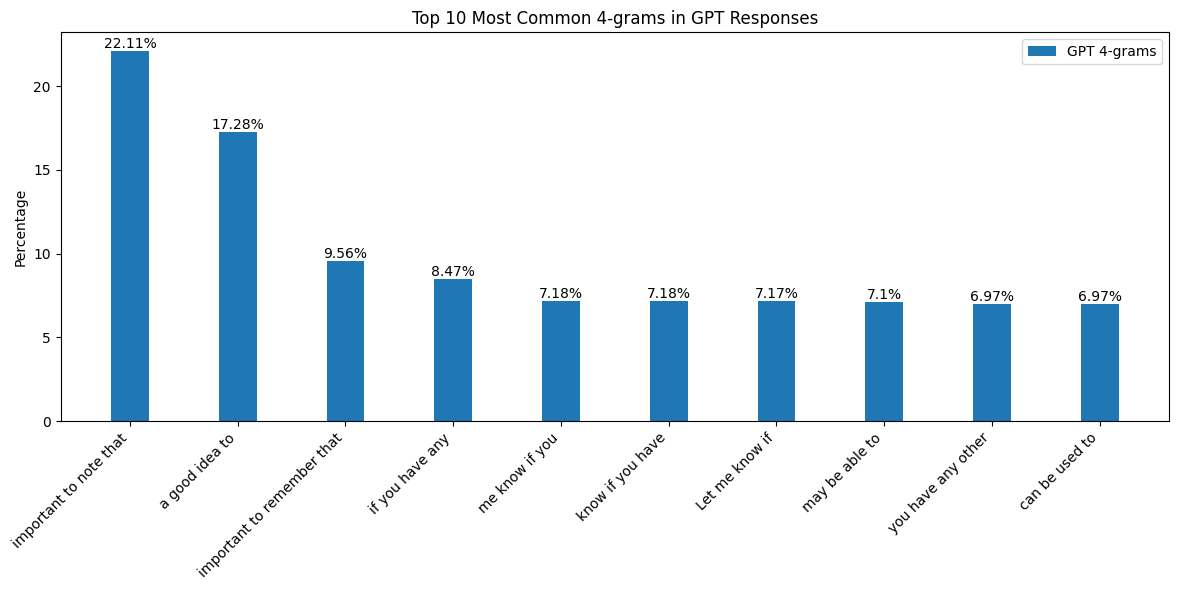

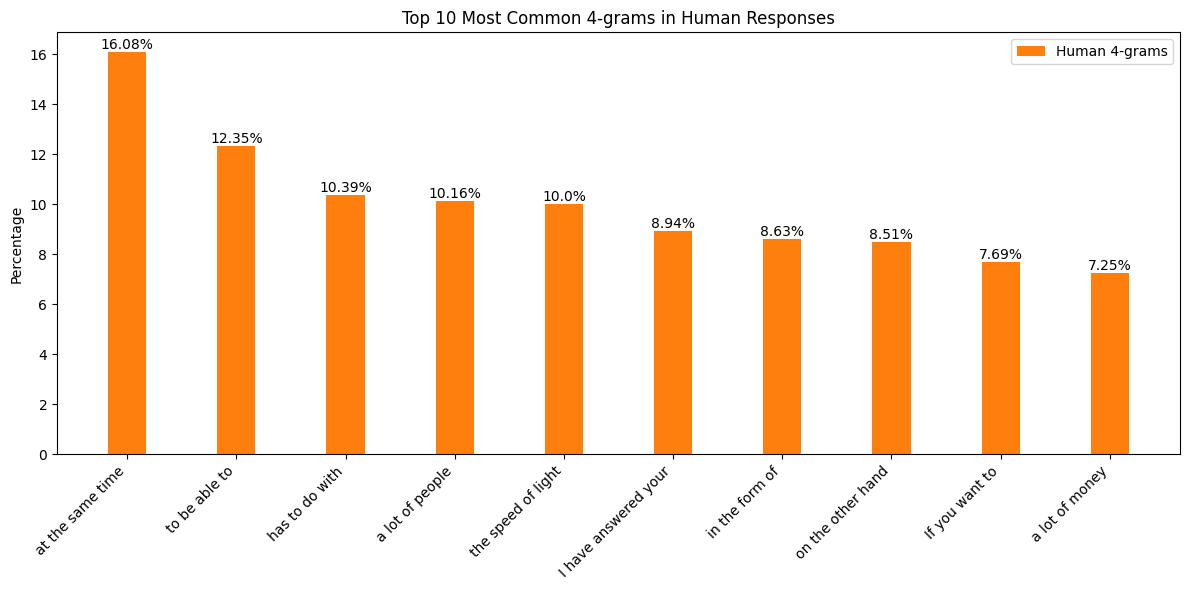

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Utilizando os dados calculados anteriormente
# gpt_4gram_labels, gpt_4gram_percentages, human_4gram_labels, human_4gram_percentages

pos = np.arange(len(gpt_4gram_labels))
bar_width = 0.35

# Cores personalizadas
gpt_color = '#1f77b4'  # Um tom de azul
human_color = '#ff7f0e'  # Um tom de laranja

# Plotando o gráfico de barras para GPT 4-grams
plt.figure(figsize=(12, 6))
gpt_bars = plt.bar(pos, gpt_4gram_percentages, bar_width, label='GPT 4-grams', color=gpt_color)

# Adicionando porcentagens nas barras
for bar in gpt_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.xticks(pos, gpt_4gram_labels, rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common 4-grams in GPT Responses')
plt.legend()
plt.tight_layout()
plt.show()

# Plotando o gráfico de barras para Human 4-grams
plt.figure(figsize=(12, 6))
human_bars = plt.bar(pos, human_4gram_percentages, bar_width, label='Human 4-grams', color=human_color)

# Adicionando porcentagens nas barras
for bar in human_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.xticks(pos, human_4gram_labels, rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Top 10 Most Common 4-grams in Human Responses')
plt.legend()
plt.tight_layout()
plt.show()


| Question                                           | Human Answer                                         | ChatGPT Answer                                      | Source      |
|----------------------------------------------------|------------------------------------------------------|-----------------------------------------------------|-------------|
| Why do we say "an apple a day keeps the doctor away"? | It's an old saying emphasizing eating healthy...    | This phrase highlights the importance of a healthy diet... | reddit_eli5 |
| What are the latest advancements in cardiac surgery? | Minimally invasive techniques and robotic...        | Recent advancements include robotic-assisted surgery... | medicine    |
| How do cryptocurrencies impact traditional banking? | They challenge the traditional financial system...  | Cryptocurrencies offer decentralized finance...    | finance     |
| Who won the Nobel Prize in Physics in 2023?        | [Name of the Winner], for breakthroughs in...       | The 2023 Nobel Prize in Physics was awarded to...  | open_qa     |
| What is the Turing Test and its significance in AI? | It's a test to determine if a machine can...        | The Turing Test, proposed by Alan Turing, is a measure... | wiki_csai   |


| Source      | Description |
|-------------|-------------|
| Reddit ELI5 | Perguntas do subreddit "Explique Como Se Eu Tivesse 5 Anos", onde os usuários buscam explicações simplificadas para tópicos complexos. |
| Finanças    | Inclui perguntas relacionadas a assuntos financeiros e econômicos. |
| Medicina    | Perguntas sobre tópicos médicos e de saúde. |
| Open QA     | Perguntas de plataformas de perguntas e respostas abertas, onde os usuários podem fazer qualquer pergunta e receber respostas da comunidade. |
| Wiki_CSAI   | Perguntas relacionadas a ciência da computação e inteligência artificial (CSAI). |
